# Import Required Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.api import qqplot

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("booking_cancellation.csv") # Reading Dataset

df.head() # Displays first 5 columns 

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# Understanding The Dataset

In [ ]:
df.shape # shape - (no. of rows, no. of columns)

(36275, 19)

In [ ]:
df.columns # Name of columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
df.info() # basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
drop_cols = ["Booking_ID", "arrival_year", "arrival_month", "arrival_date"]
df = df.drop(columns = drop_cols, axis = 1)

In [ ]:
df.describe().T  # Description/summary of the dataframe

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0
no_of_previous_cancellations,36275.0,0.023349,0.368331,0.0,0.0,0.00,0.0,13.0
no_of_previous_bookings_not_canceled,36275.0,0.153411,1.754171,0.0,0.0,0.00,0.0,58.0
avg_price_per_room,36275.0,103.423539,35.089424,0.0,80.3,99.45,120.0,540.0


In [ ]:
df.isnull().sum() # counting the number of null values in each column

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
df.duplicated().sum() 

10746

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum() 

0

In [ ]:
# This is a template to find if a feature is categorical or numerical or numerical value thats actually categorical e.g(year)

  
'''
    dataframe - > variable containing our dataset 
    cat_th -> categorical variable's class threshold
    car_th -> cardinal variable's class threshold
'''

def grab_col_names(dataframe, cat_th=10, car_th=20): 

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]            # categorical columns with type object 

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and # categorical variable with numerical appearance
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and # Cardinal variable with categorical appearance
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat                                                        # all categorical variables

    cat_cols = [col for col in cat_cols if col not in cat_but_car]                           # removing cardinal variables

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]            # numerical columns with type number

    num_cols = [col for col in num_cols if col not in num_but_cat if col not in cat_cols]                           # removing categorical variables

    # prints the number of each category
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car,num_but_cat

In [ ]:
cat_cols, num_cols, cat_but_car,num_but_cat = grab_col_names(df)

Observations: 25529
Variables: 15
cat_cols: 11
num_cols: 4
cat_but_car: 0
num_but_cat: 7


In [ ]:
print("Categorial :",cat_cols,"\nlength:",len(cat_cols))
print("Numerical :",num_cols,"\nlength:",len(num_cols))

Categorial : ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'required_car_parking_space', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_special_requests'] 
length: 11
Numerical : ['no_of_week_nights', 'lead_time', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room'] 
length: 4


In [ ]:
print(cat_cols[0])
df[cat_cols[0]].value_counts()

type_of_meal_plan


Meal Plan 1     20027
Not Selected     4364
Meal Plan 2      1133
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [ ]:
print(cat_cols[1])
df[cat_cols[1]].value_counts()

room_type_reserved


Room_Type 1    18207
Room_Type 4     5392
Room_Type 6      940
Room_Type 2      598
Room_Type 5      230
Room_Type 7      156
Room_Type 3        6
Name: room_type_reserved, dtype: int64

In [ ]:
print(cat_cols[2])
df[cat_cols[2]].value_counts()

market_segment_type


Online           19791
Offline           4033
Corporate         1289
Complementary      320
Aviation            96
Name: market_segment_type, dtype: int64

In [ ]:
print(cat_cols[3])
df[cat_cols[3]].value_counts()

booking_status


Not_Canceled    18129
Canceled         7400
Name: booking_status, dtype: int64

In [ ]:
print(cat_cols[4])
df[cat_cols[4]].value_counts()

no_of_adults


2    18607
1     4602
3     2170
0      134
4       16
Name: no_of_adults, dtype: int64

In [ ]:
print(cat_cols[5])
df[cat_cols[5]].value_counts()

no_of_children


0     22960
1      1519
2      1029
3        18
9         2
10        1
Name: no_of_children, dtype: int64

In [ ]:
print(cat_cols[6])
df[cat_cols[6]].value_counts()

no_of_weekend_nights


0    10758
1     7333
2     7138
3      133
4      122
5       24
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

In [ ]:
print(cat_cols[7])
df[cat_cols[7]].value_counts()

required_car_parking_space


0    24443
1     1086
Name: required_car_parking_space, dtype: int64

In [ ]:
print(cat_cols[8])
df[cat_cols[8]].value_counts()

repeated_guest


0    24706
1      823
Name: repeated_guest, dtype: int64

In [ ]:
print(cat_cols[9])
df[cat_cols[9]].value_counts()

no_of_previous_cancellations


0     25260
1       132
2        46
3        43
11       25
5        11
4        10
13        1
6         1
Name: no_of_previous_cancellations, dtype: int64

In [ ]:
print(cat_cols[10])
df[cat_cols[10]].value_counts()

no_of_special_requests


0    11670
1     9355
2     3825
3      600
4       73
5        6
Name: no_of_special_requests, dtype: int64

# Visualisation

In [ ]:
''' 
    function takes a single dataframe column name as argument and
    plots a 1 x 2 subplot contains (pie plot and bar plot) 
'''
def plot_categorical(col_name):

  # sets 1 x 2 subplots with figure size of (13,9)
  fig,axes = plt.subplots( 1, 2, figsize = (13,9))

  # plots pie chart of given column with % percentage
  df[col_name].value_counts().plot.pie(autopct="%.0f%%", shadow=True,startangle=180,ax=axes[0])

  # plots barplot of given column
  df[col_name].value_counts().plot.bar(ax = axes[1] )

  # set plot's title
  fig.suptitle(col_name.title())
  
  # shows the plot
  plt.show()

In [ ]:
'''
    function takes a single dataframe column name as argument and
    plots a 2 x 2 subplot contains (histogram, quantile-quantile plot, kernel density estimate plot and cumulative density plot)
'''
def plot_distribution(col_name):

  # sets 2 x 2 subplots with figure size of (12,8)
  fig,axes = plt.subplots( 2, 2, figsize = (12,8) )

  # displays histogram of the given dataframe column
  sns.histplot( x = col_name, data = df, ax = axes[0][0],hue = "booking_status",bins = 20 )

  # displays quantile-quantile plot of the given dataframe column
  qqplot( data = df[col_name], ax = axes[0][1], line = "45", fit = True )

  # displays kernel density estimate plot of the given dataframe column
  sns.kdeplot( x = col_name, data= df,hue="booking_status", ax = axes[1][0], fill = True )

  # displays cumulative density plot of the given dataframe column 
  sns.kdeplot( x = col_name, data= df, ax = axes[1][1], hue = "booking_status",fill = True, cumulative = True ) 

  # sets the title for the subplot as "Distribution of <column name>"  
  plt.suptitle( "Distribution of " + col_name )

  plt.show()  # shows the plot

In [ ]:
'''
    function takes a single dataframe column name as argument and
    plots a 2 x 2 subplot contains (boxplot, violinplot, swarmplot and barplot)
'''
def plot_stats(col_name):

    # sets 2 x 2 subplots with figure size of (14,10)
    fig, axes = plt.subplots(1, 2, figsize=(14, 10))  

    # displays boxplot of the given dataframe column
    sns.boxplot(y=col_name, x="booking_status", data=df, ax=axes[0]) 

    # displays violinplot of the given dataframe column
    sns.violinplot(y=col_name, x="booking_status", data=df, ax=axes[1], split=True,)  

    # sets the title for the subplot as "Statistics of <column name>"
    plt.suptitle("Statistics of " + col_name)  


    plt.show()  # shows the plot

In [ ]:
'''
  function takes a single dataframe column name as argument and
  plots a single plot contains kernel density estimate plot
'''
def plot_kde(col_name, by = "booking_status"):

    # sets a seaborn FacetGrid with hue = "Outcome" and palette as "set2"
    facet = sns.FacetGrid(df, hue=by, aspect=4) 

    # kernel density plot of the given dataframe column respect to the dependent column "Outcome"
    facet.map(sns.kdeplot, col_name, shade=True)  

    # sets the x axis from 0 to maximum value of the column
    facet.set( xlim=(0, df[col_name].max()))  

    facet.add_legend()  # add legend to the plot

    # sets the title for the plot as "<column name> respect to <by name>"
    plt.title(f"{col_name} respect to {by}")  
    
    plt.show()  # shows the plot

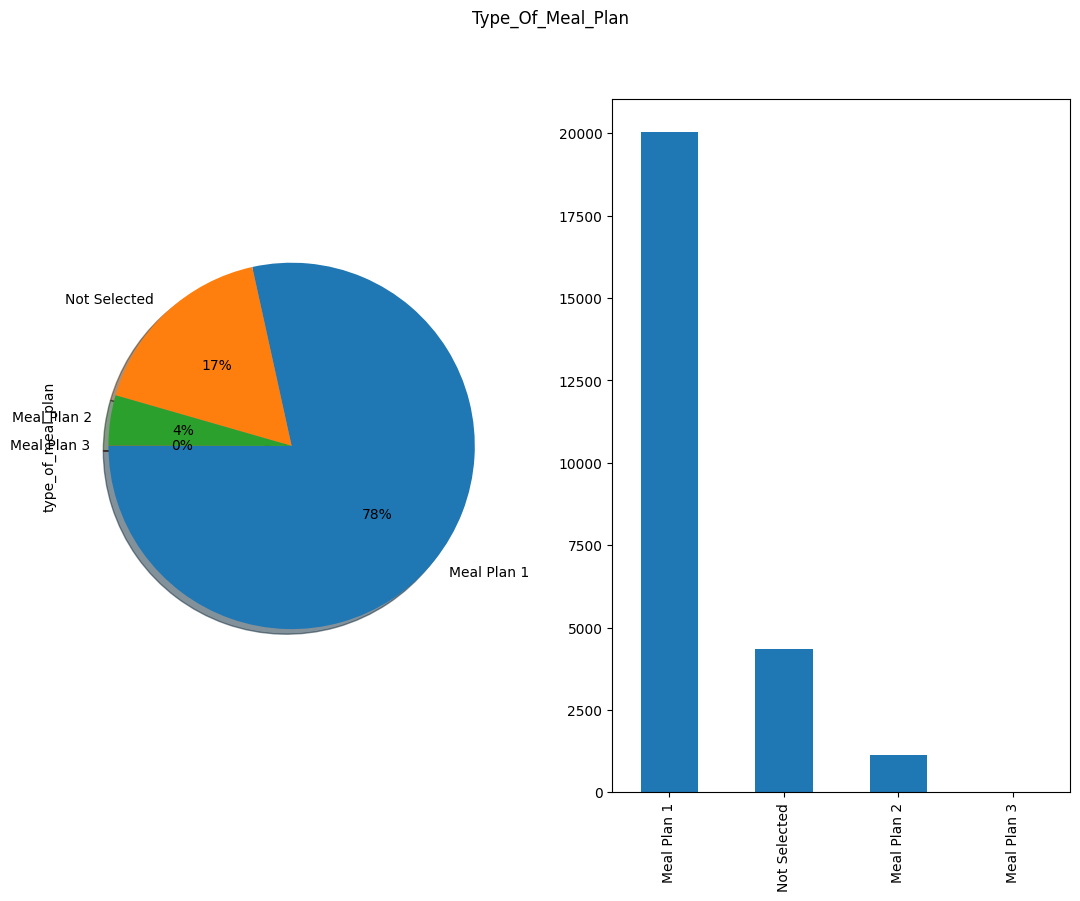

In [ ]:
plot_categorical(cat_cols[0])

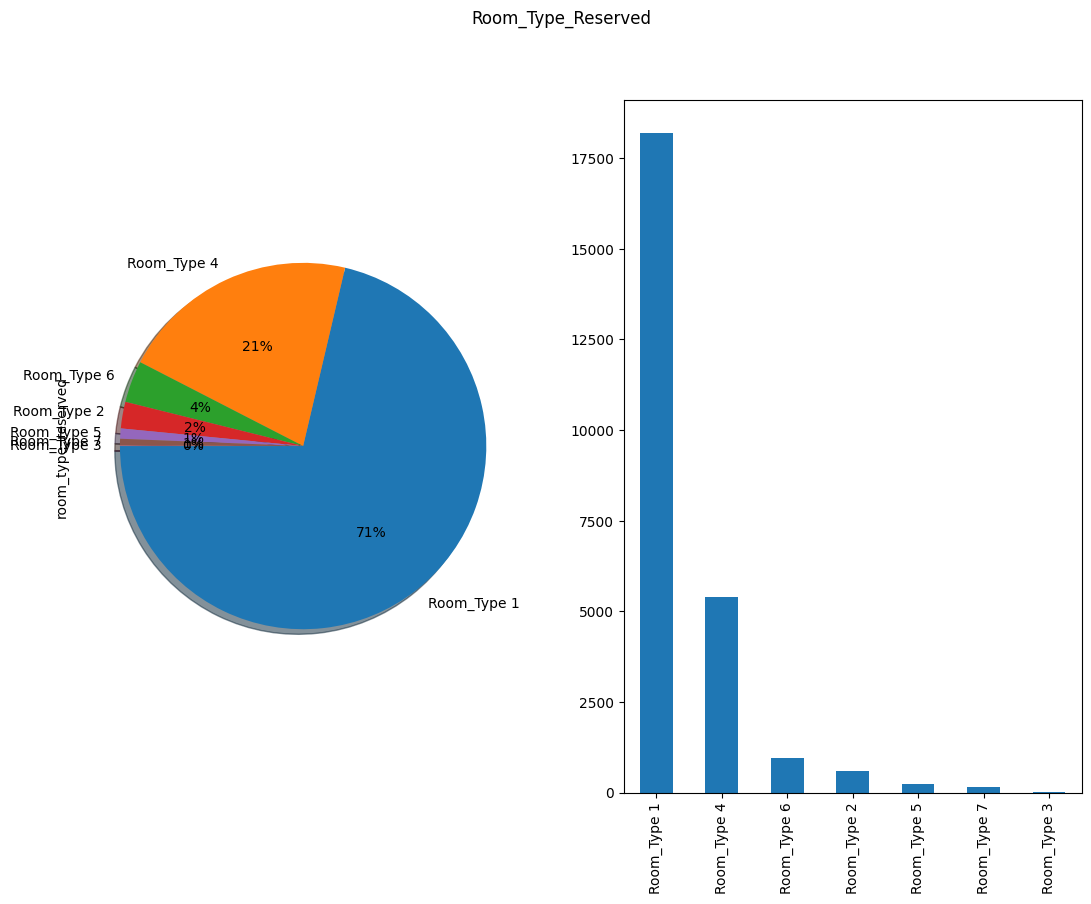

In [ ]:
plot_categorical(cat_cols[1])

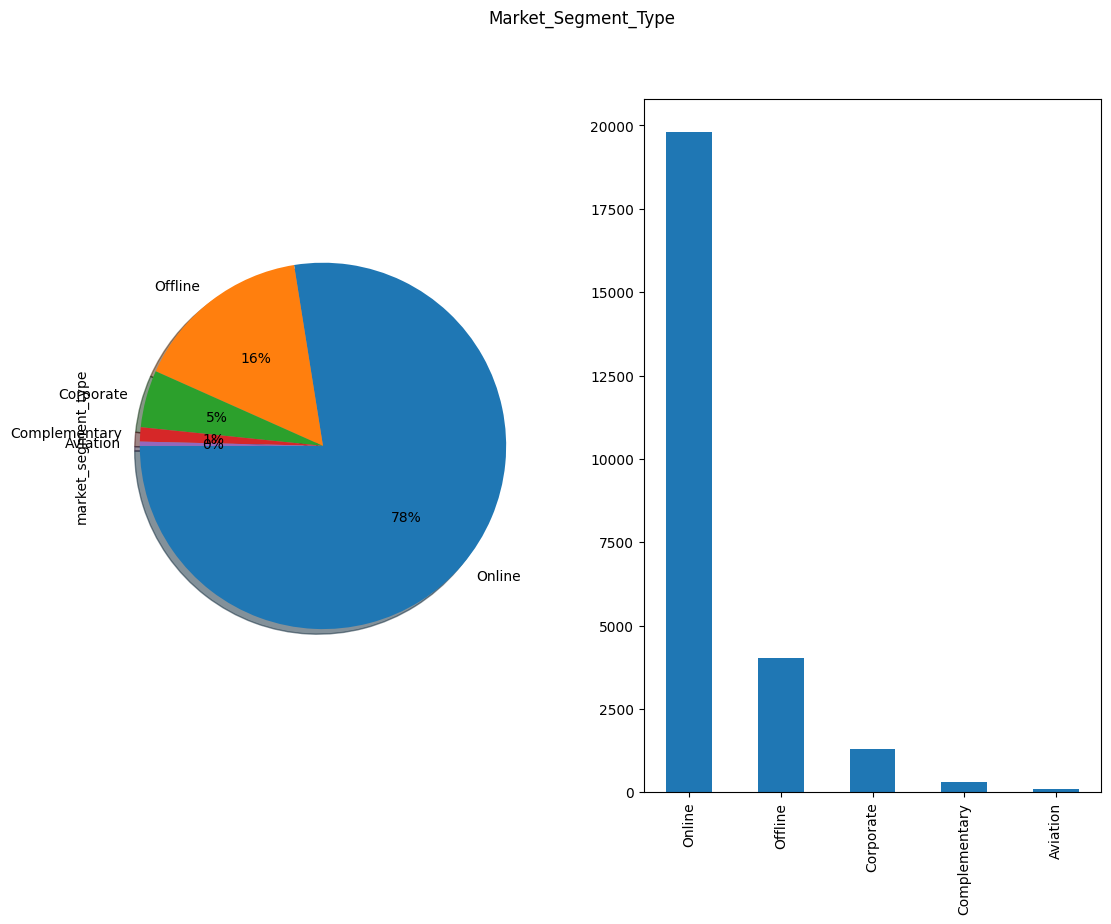

In [ ]:
plot_categorical(cat_cols[2])

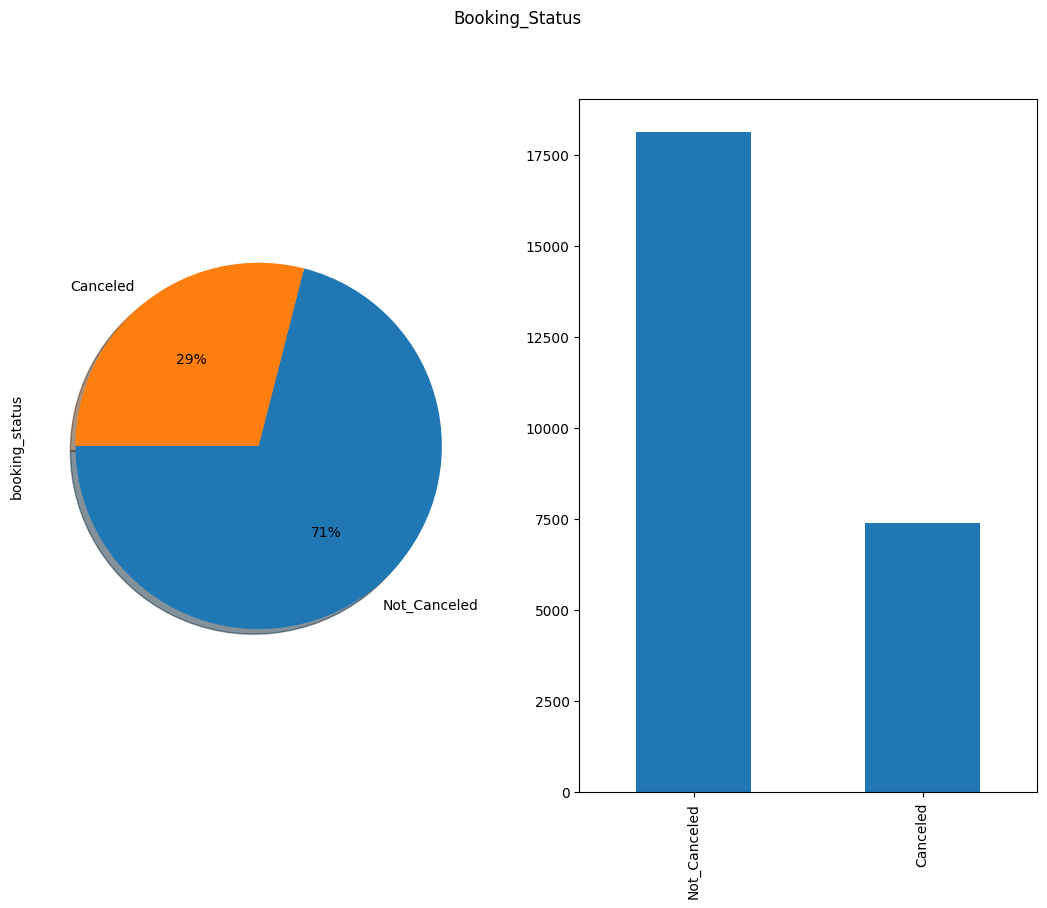

In [ ]:
plot_categorical(cat_cols[3])

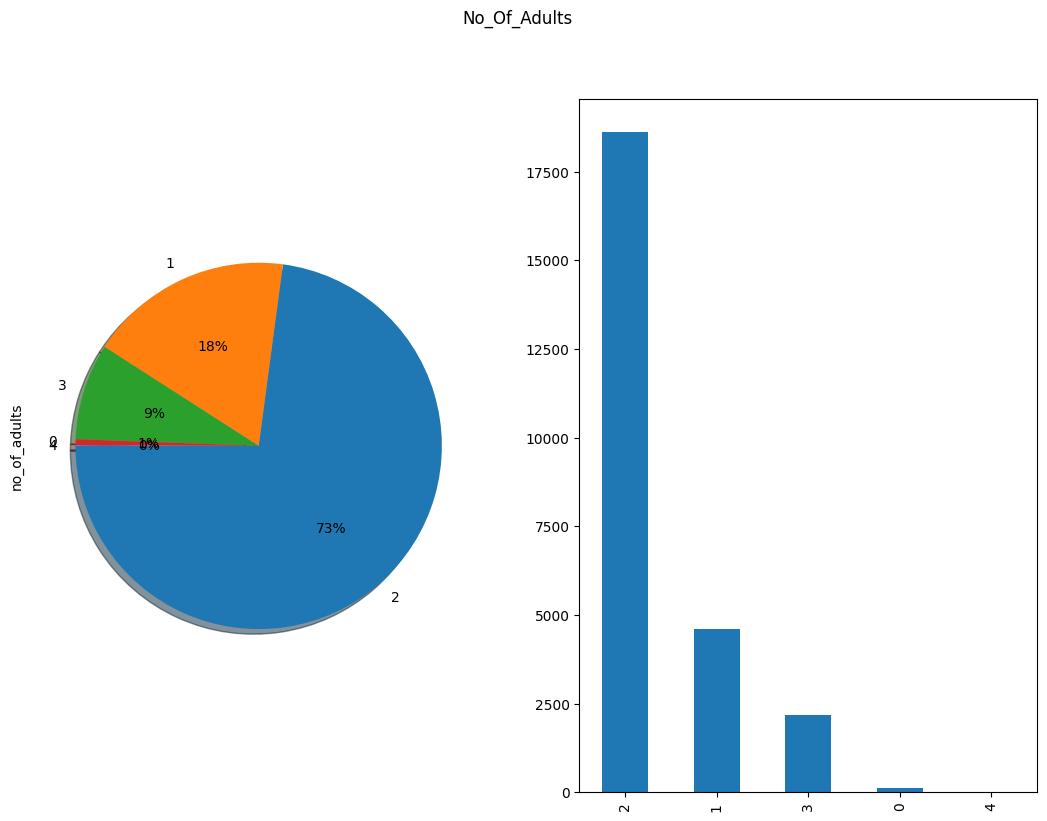

In [ ]:
plot_categorical(cat_cols[4])

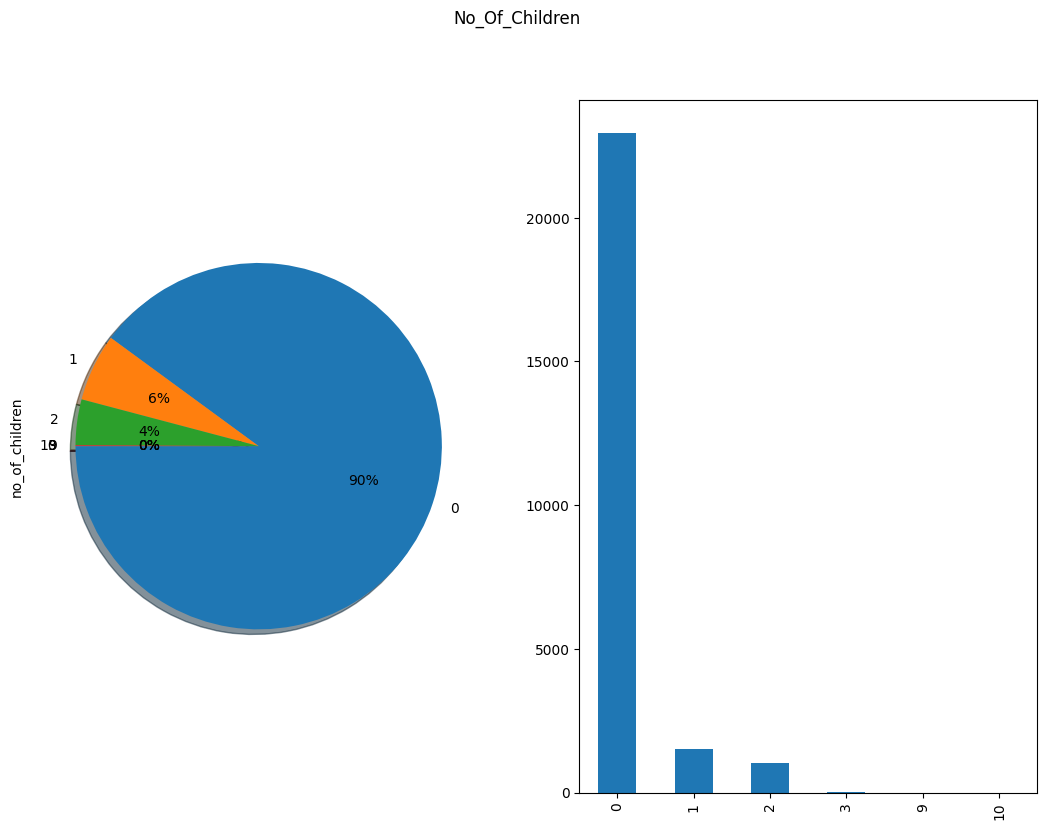

In [ ]:
plot_categorical(cat_cols[5])

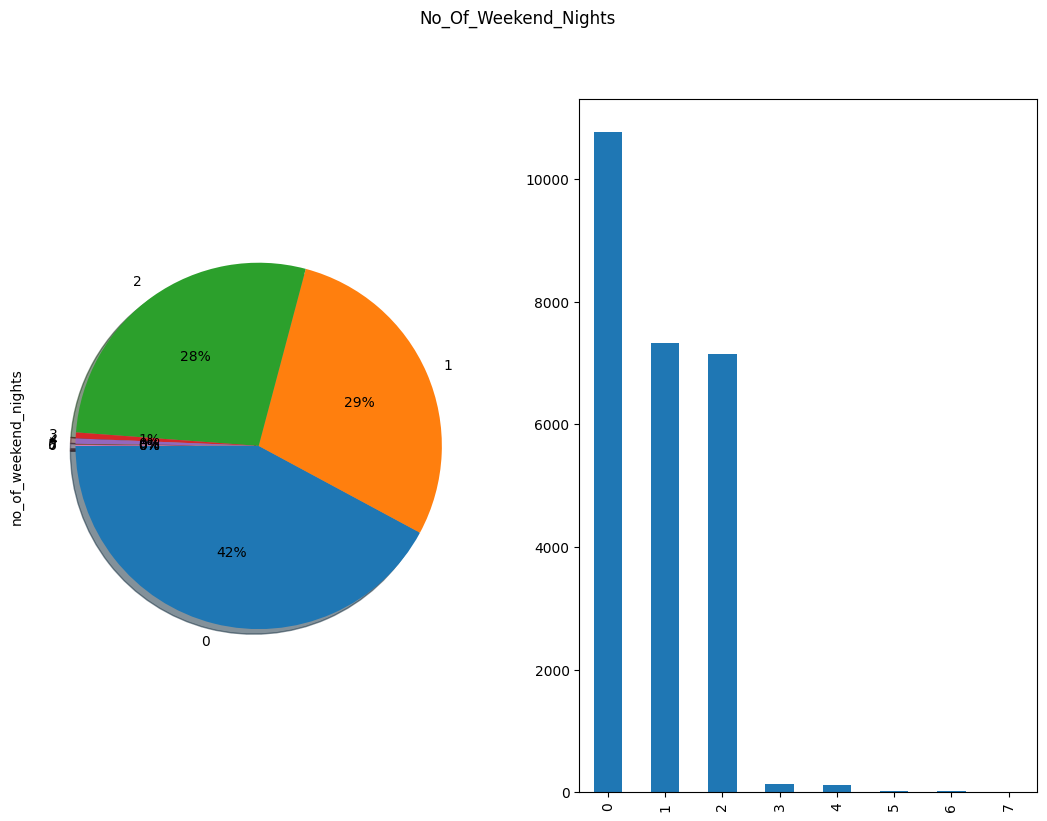

In [ ]:
plot_categorical(cat_cols[6])

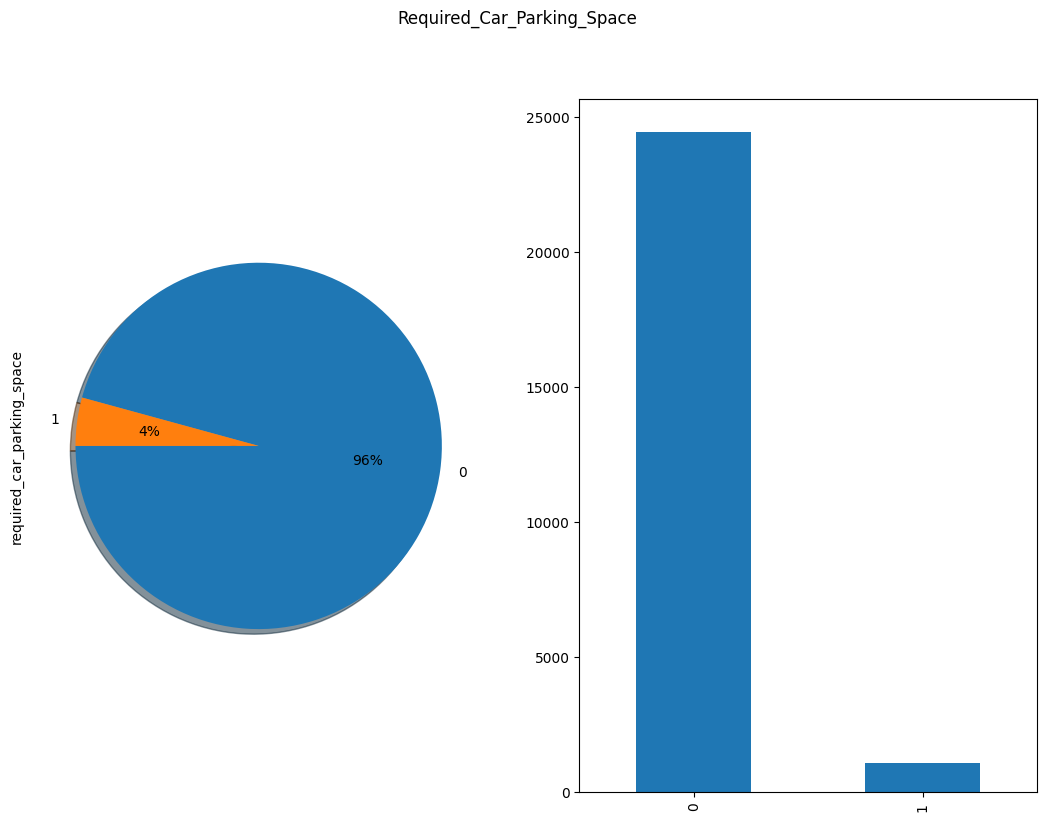

In [ ]:
plot_categorical(cat_cols[7])

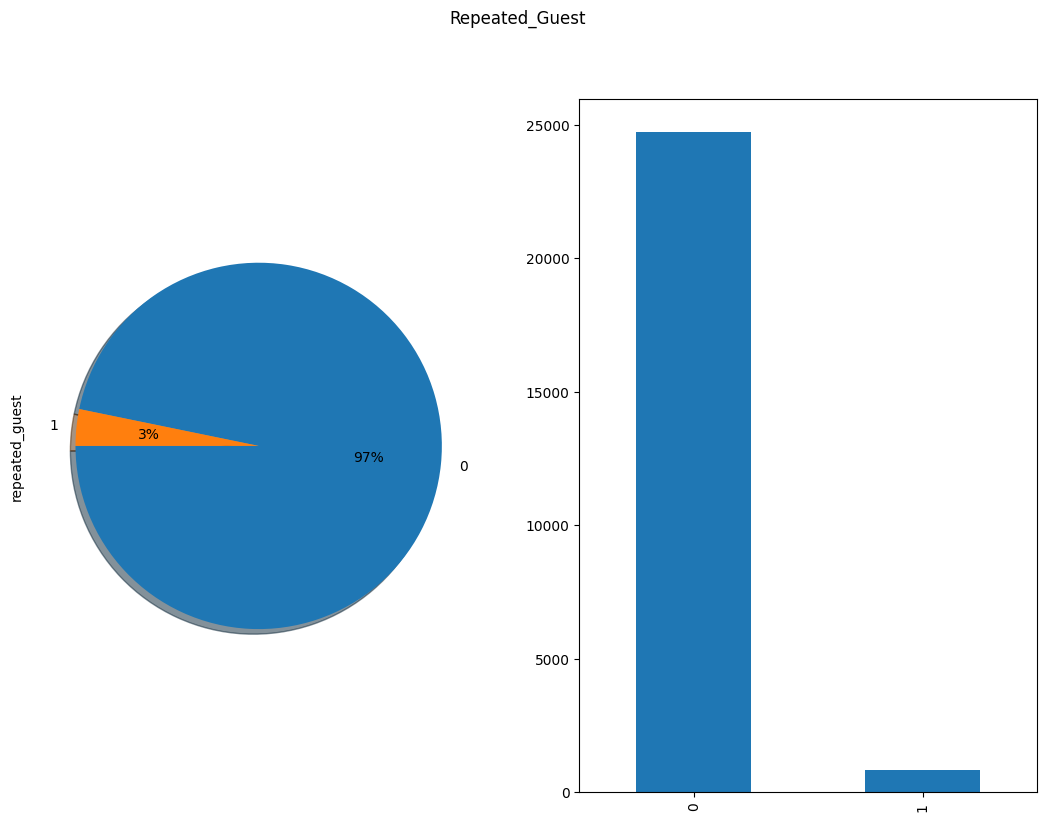

In [ ]:
plot_categorical(cat_cols[8])

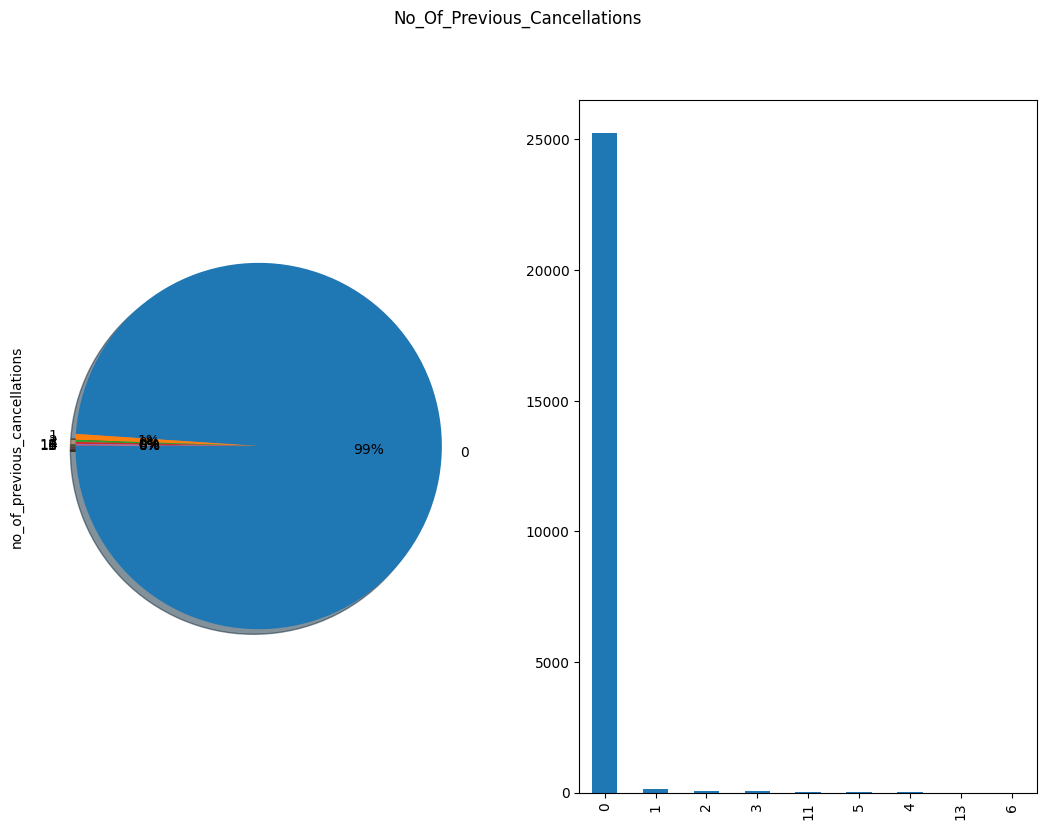

In [ ]:
plot_categorical(cat_cols[9])

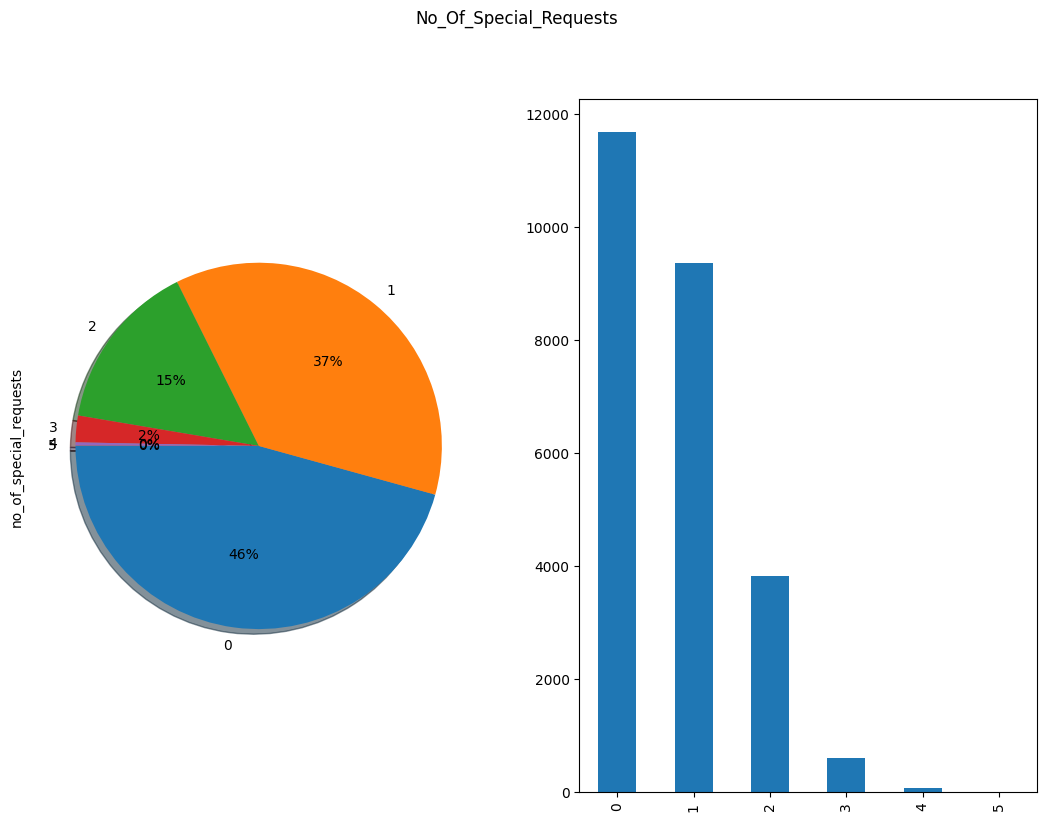

In [ ]:
plot_categorical(cat_cols[10])

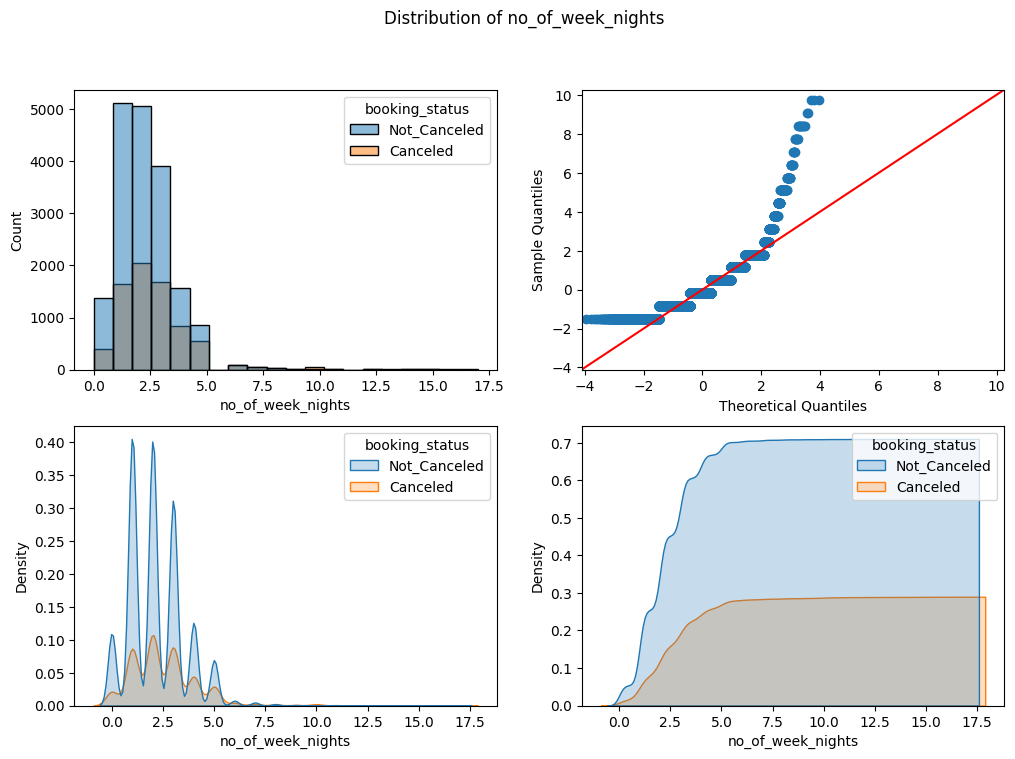

In [ ]:
plot_distribution(num_cols[0])

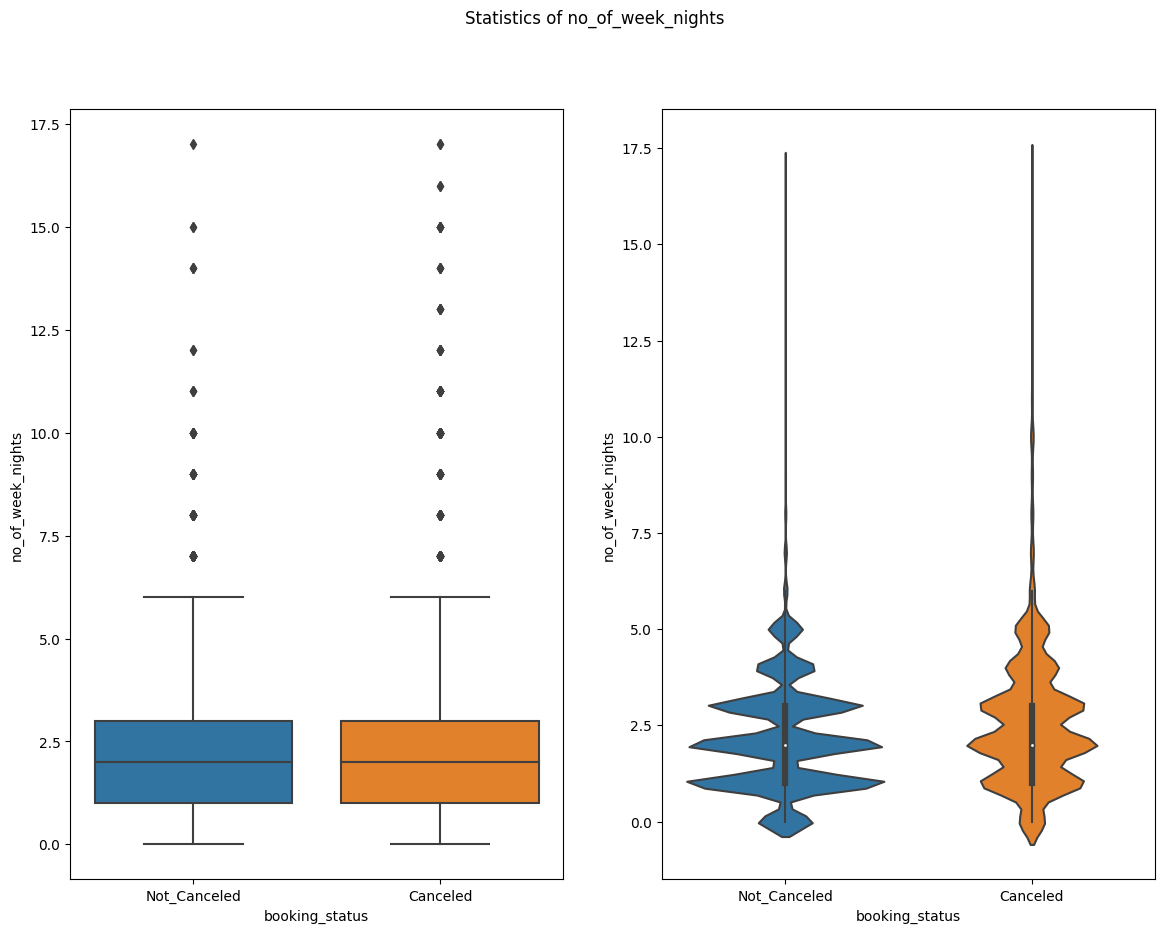

In [ ]:
plot_stats(num_cols[0])

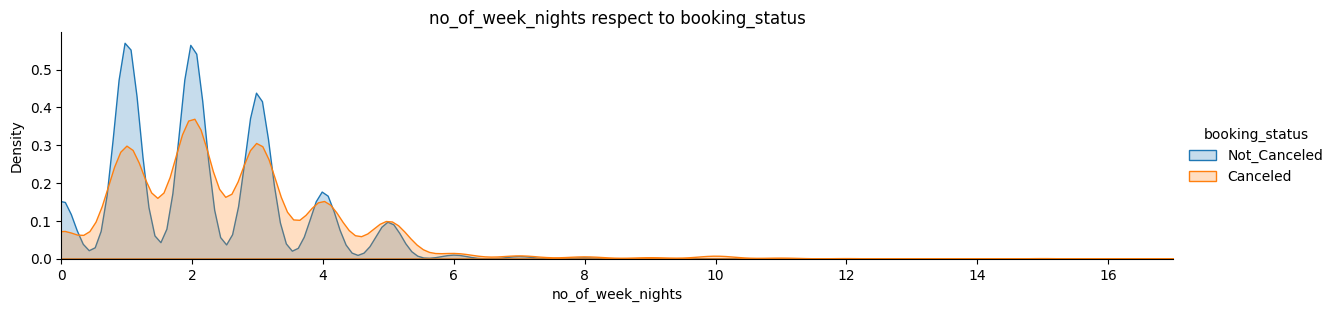

In [ ]:
plot_kde(num_cols[0])

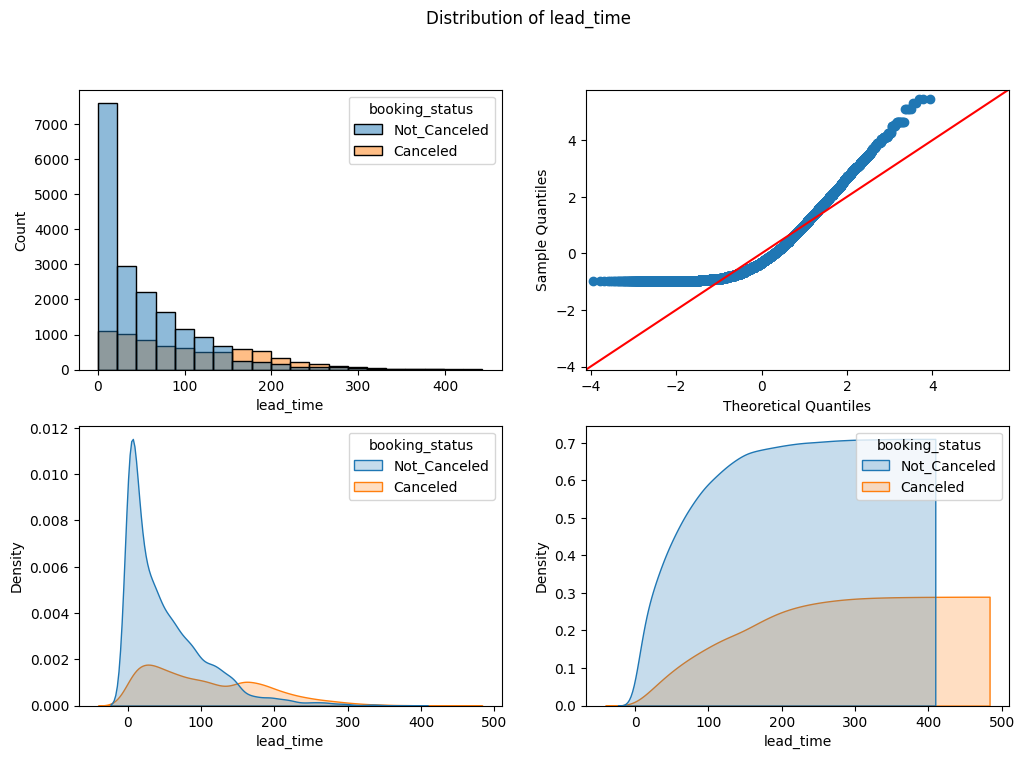

In [ ]:
plot_distribution(num_cols[1])

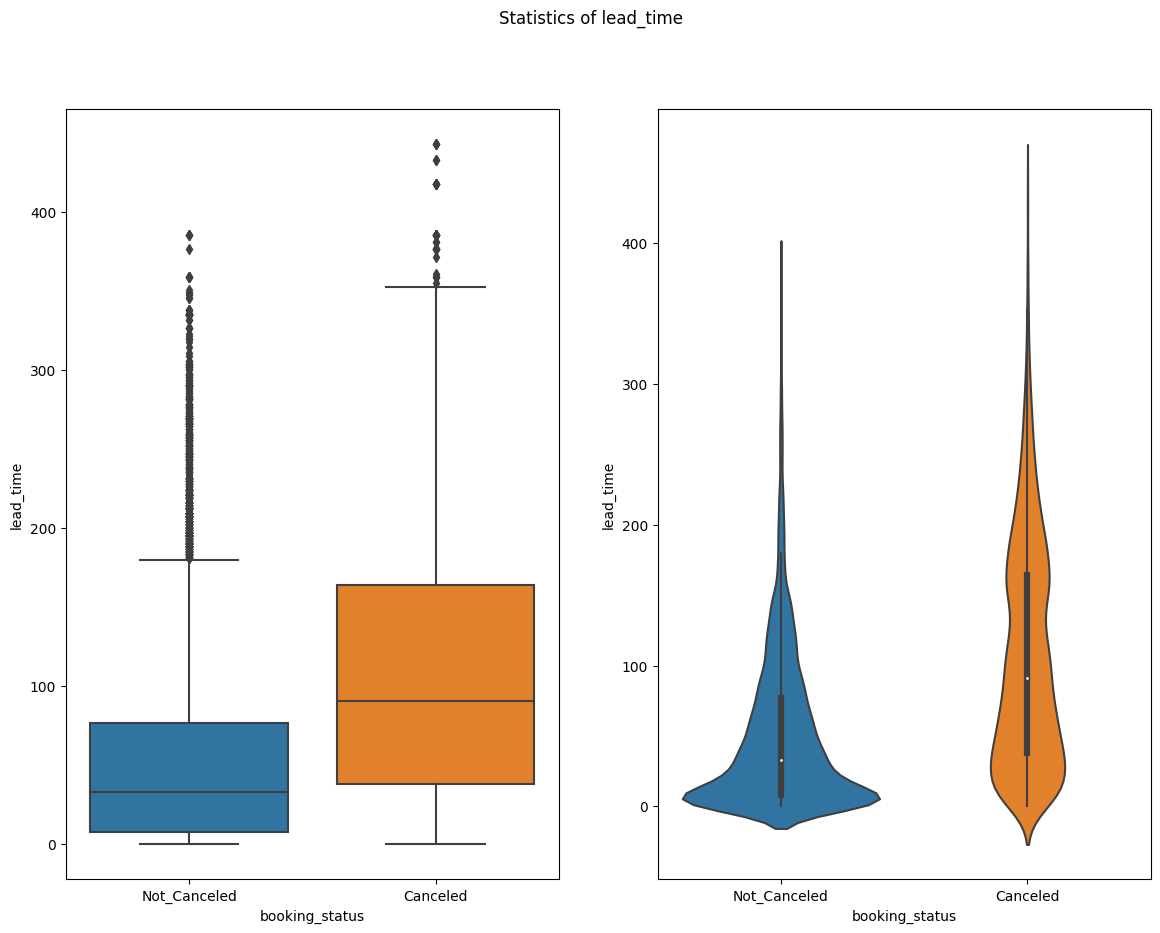

In [ ]:
plot_stats(num_cols[1])

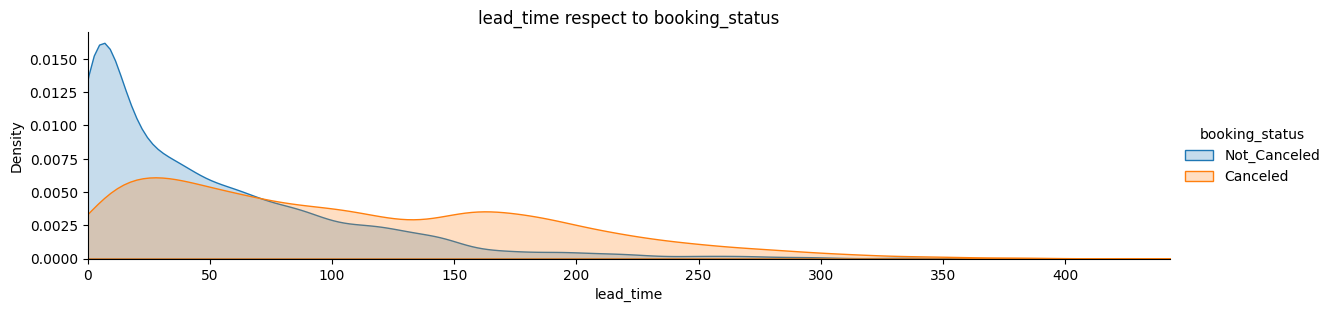

In [ ]:
plot_kde(num_cols[1])

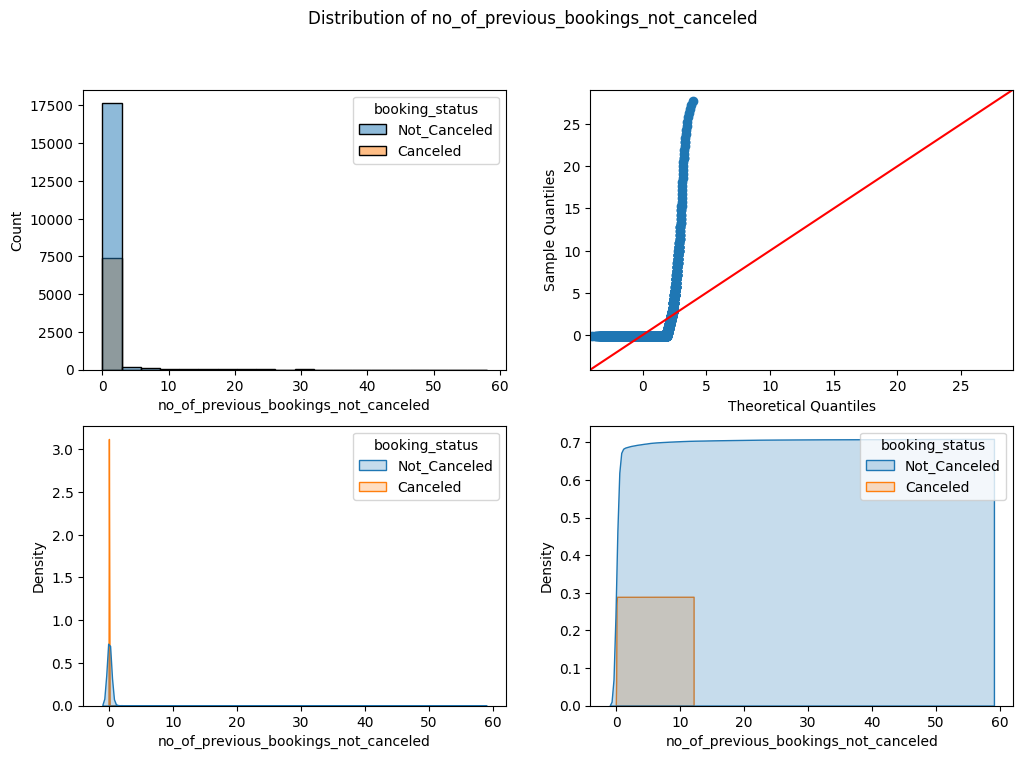

In [ ]:
plot_distribution(num_cols[2])

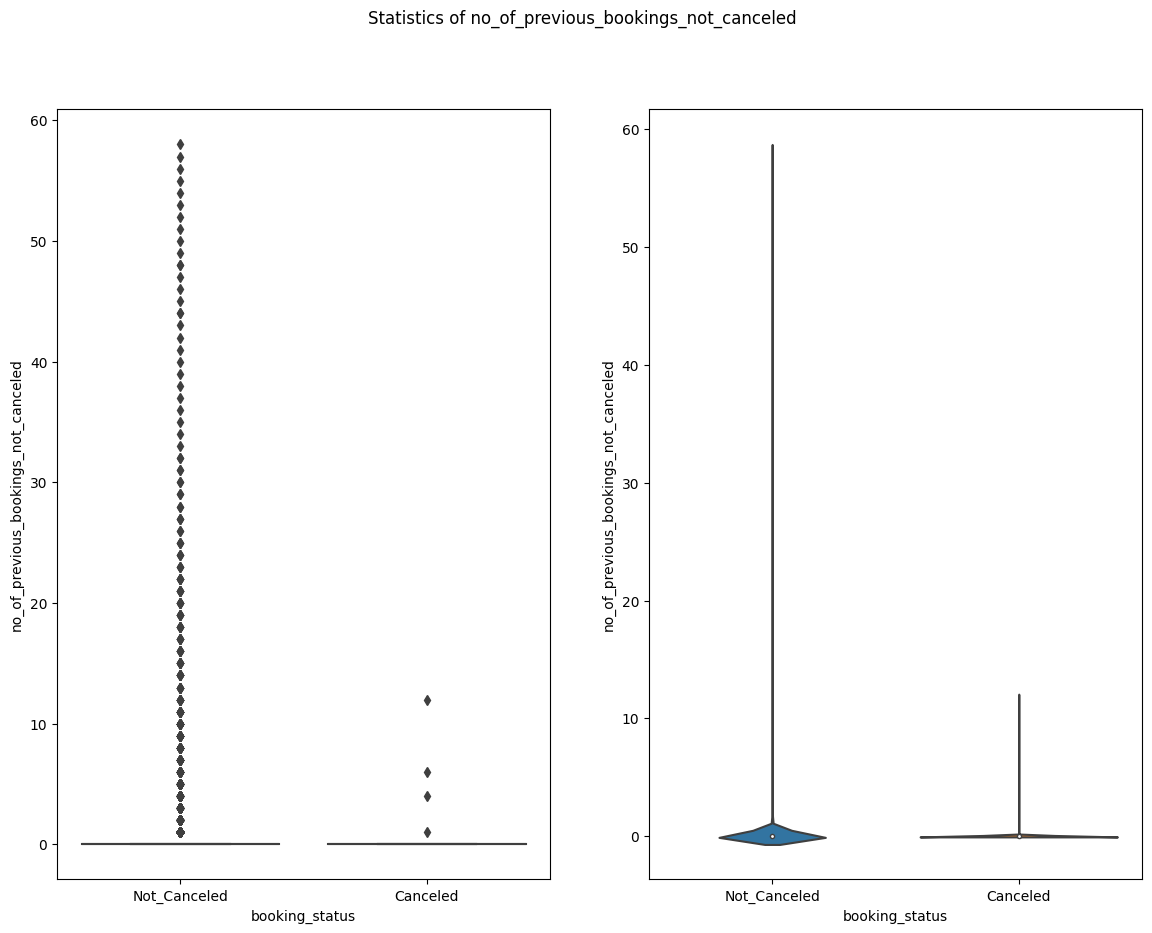

In [ ]:
plot_stats(num_cols[2])

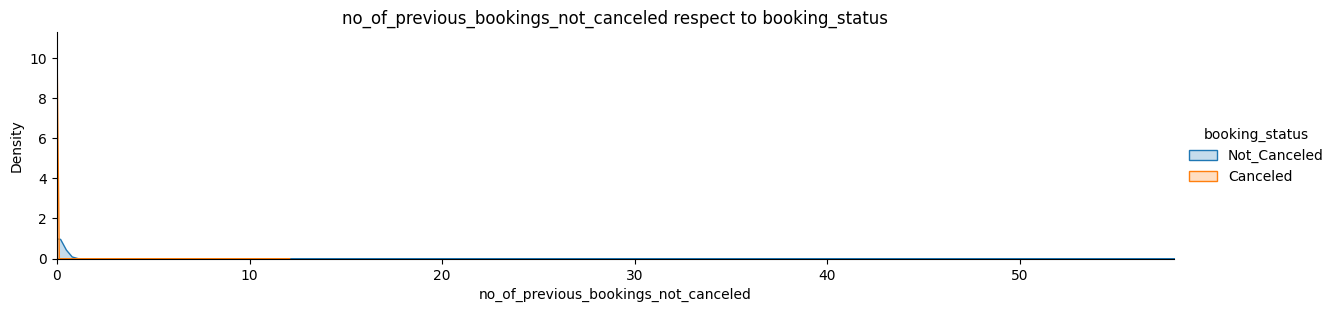

In [ ]:
plot_kde(num_cols[2])

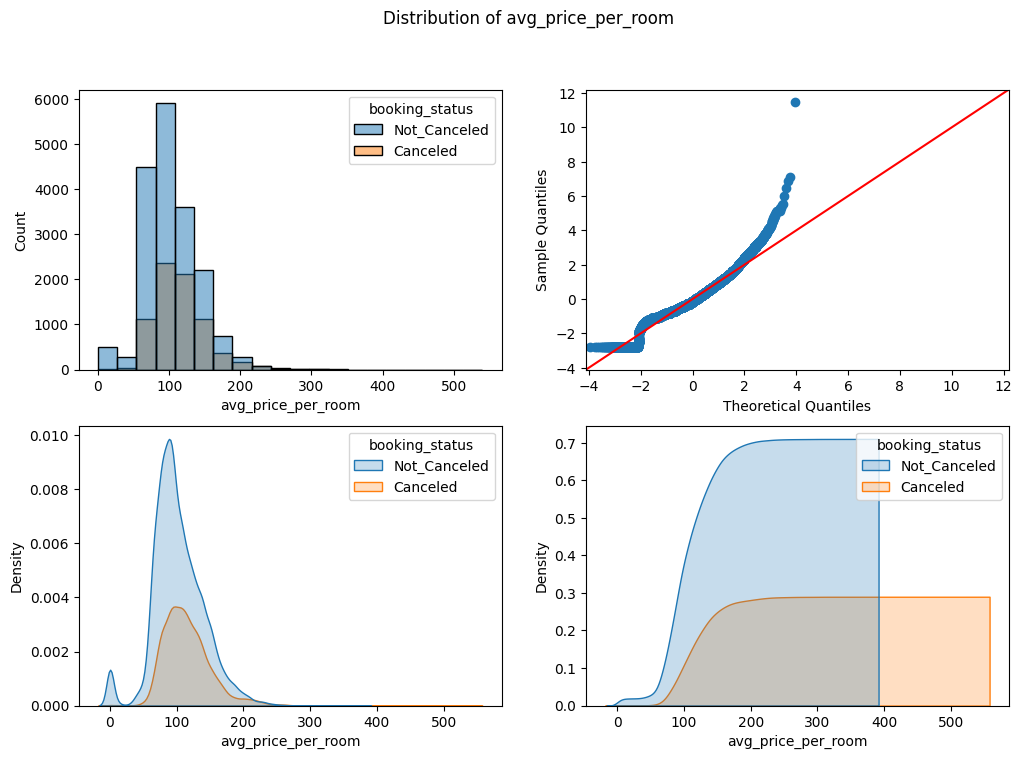

In [ ]:
plot_distribution(num_cols[3])

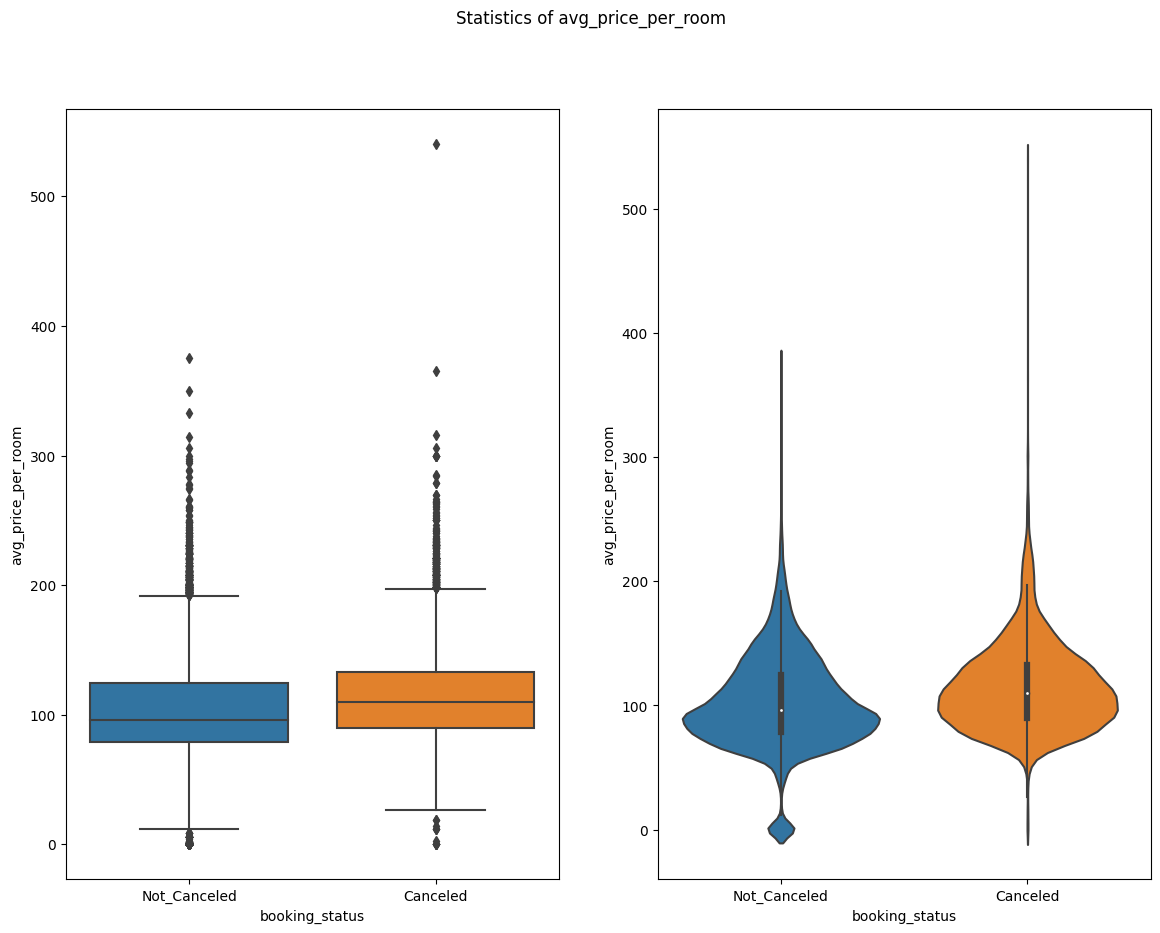

In [ ]:
plot_stats(num_cols[3])

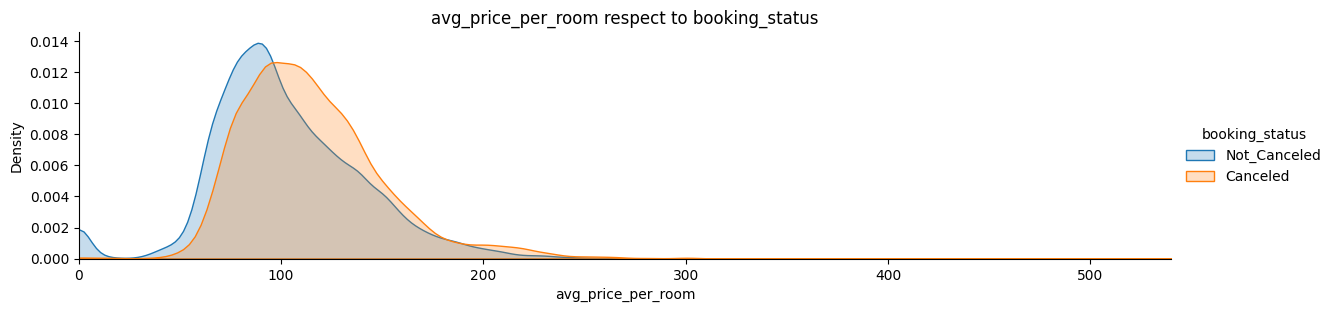

In [ ]:
plot_kde(num_cols[3])

# Pairplot

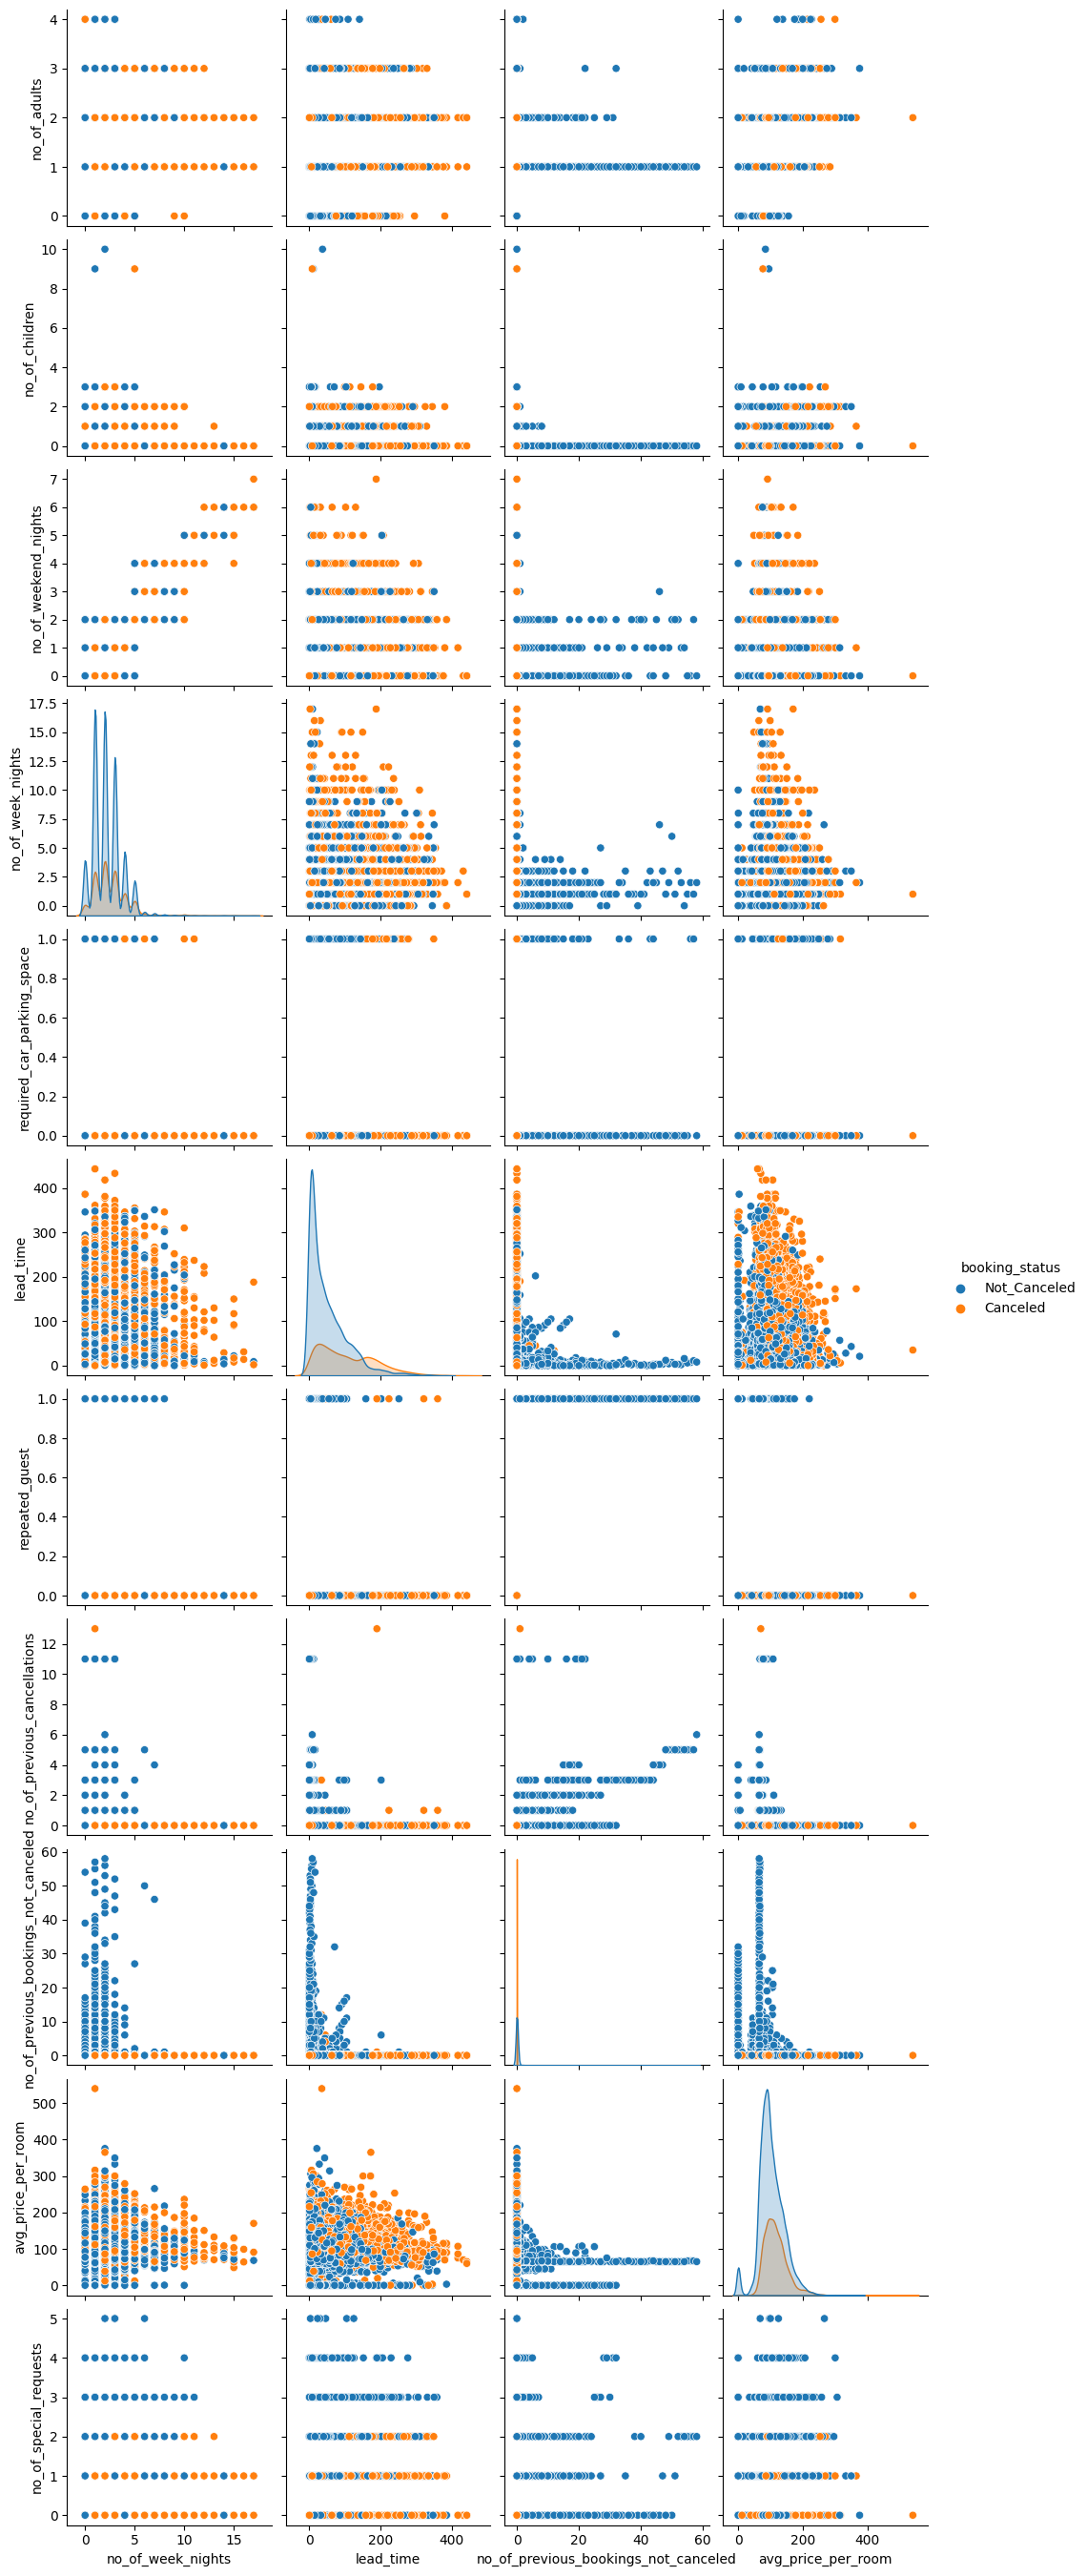

In [ ]:
sns.pairplot(
    df,
    hue="booking_status",
    x_vars=num_cols
)  # pairplot with given columns in x axis and all columns in y axis
plt.show()  # shows the plot

# **Observations**

1. Customers who book for more than 7 or 8 week nights cancelled the most.
2. Customers usually bring atmost 3 children to the hotel.
3. Most cancellations happen when there is no children and just one adult, maybe they feel lonely and bored and are not satisfied enough by the hotels services.
4. There is a higher chance of cancellation if the Customers stay for 4 weekend nights or more.
5. There is a higher chance of cancellation if the Customers require car parking spaces.
6. The higher the lead time, the more there is a chance for the customer to cancel the booking.
7. The booking has less chance of being cancelled if the customer already stayed atleast once(repeated) or if the previous bookings were not cancelled.
8. Customers who make special requests tend to cancel less.

# Feature Encoding

In [ ]:
drop_cols = ["required_car_parking_space", "repeated_guest", "no_of_previous_cancellations"]
df = df.drop(columns = drop_cols, axis = 1)

In [ ]:
def Child(x):
    if x!=0:
        return 1
    else:
        return 0
df[cat_cols[5]] = df[cat_cols[5]].apply(Child)

In [ ]:
def not_Meal_Plan_1(x):
    if x!='Meal Plan 1':
        return "Other"
    else:
        return "Meal Plan 1"
df[cat_cols[0]] = df[cat_cols[0]].apply(not_Meal_Plan_1)

In [ ]:
def not_Online(x):
    if x!='Online':
        return "Other"
    else:
        return "Online"
df[cat_cols[2]] = df[cat_cols[2]].apply(not_Online)

In [ ]:
def not_Room_Type_1(x):
    if x!='Room_Type 1':
        return "Other"
    else:
        return "Room_Type 1"
df[cat_cols[1]] = df[cat_cols[1]].apply(not_Room_Type_1)

In [ ]:
def Adults(x):
    if x==1:
        return 1
    if x==2:
        return 2
    else:
        return 0
df[cat_cols[4]] = df[cat_cols[4]].apply(Adults)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Binary Encoding:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

for col in binary_cols:
    label_encoder(df, col)

# Correlation

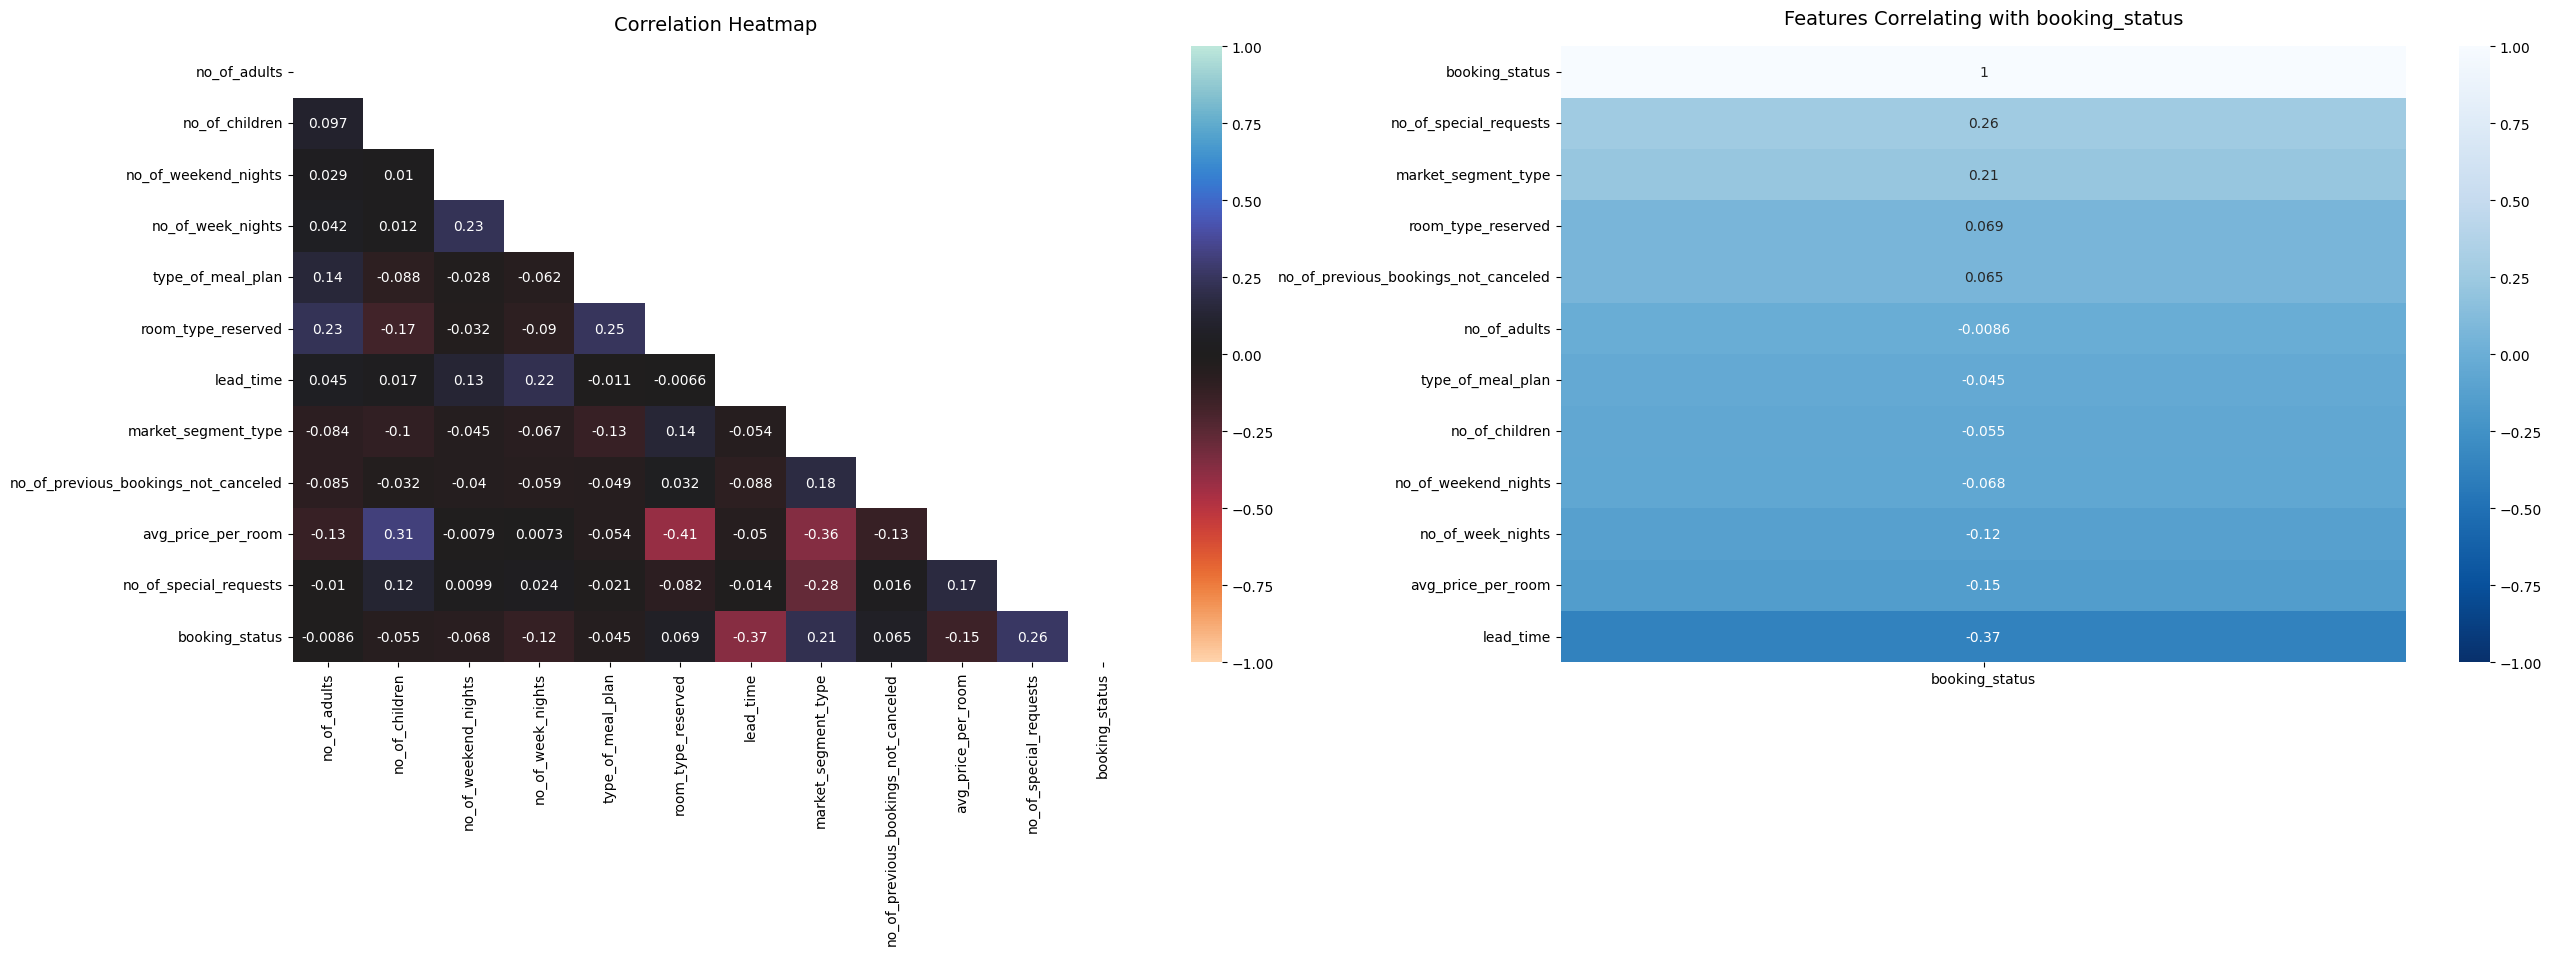

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,8))  # create a 1 x 2 subplot grid
resign_corr = df.corr()  # calculate correlation of the dataframe

mask = np.triu(resign_corr)
cat_heatmap = sns.heatmap(
    df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, ax=ax[0], cmap="icefire_r"
)  # cornor heatmap of the dataframe correlation

cat_heatmap.set_title(
    "Correlation Heatmap", fontdict={"fontsize": 14}, pad=12
)  # sets the title for the heatmap with font size 14 and padding 12


heatmap = sns.heatmap(
    resign_corr[["booking_status"]].sort_values(by="booking_status", ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
    ax=ax[1],
    cmap="Blues_r",
)  # create heatmap for features correlating with the dependant varibale 'HeartDisease'

heatmap.set_title(
    "Features Correlating with booking_status",
    fontdict={"fontsize": 14},
    pad=16,  # sets the title for the heatmap with font size 14 and padding 16
)

plt.show()  # shows the subplot

# Feature Selection

In [ ]:
drop_cols = ["no_of_adults","no_of_children","no_of_weekend_nights","no_of_week_nights","type_of_meal_plan","room_type_reserved","no_of_previous_bookings_not_canceled"]
df = df.drop(columns = drop_cols, axis = 1)
df.head()

,lead_time,market_segment_type,avg_price_per_room,no_of_special_requests,booking_status
0,224,1,65.00,0,1
1,5,0,106.68,1,1
2,1,0,60.00,0,0
3,211,0,100.00,0,0
4,48,0,94.50,0,0


# Treating outliers

In [ ]:
from numpy.random import seed
seed(1)
def remove_outlier(dataframe, col_name, q1=0.01, q3=0.99):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    

    df_without_outliers = dataframe[(dataframe[col_name] > low_limit)]
    df_without_outliers = dataframe[(dataframe[col_name] < up_limit)]

      
    return df_without_outliers
df = remove_outlier(df,"avg_price_per_room")
df = remove_outlier(df,"lead_time")

# Data Splitting

In [ ]:
X = df.drop(['booking_status'], axis = 1)  # Independent variables
y = df['booking_status']                   # Target/ dependent variable

In [ ]:
X[:5]

,lead_time,market_segment_type,avg_price_per_room,no_of_special_requests
0,224,1,65.00,0
1,5,0,106.68,1
2,1,0,60.00,0
3,211,0,100.00,0
4,48,0,94.50,0


In [ ]:
y[:5]

0    1
1    1
2    0
3    0
4    0
Name: booking_status, dtype: int64

# Data Sampling

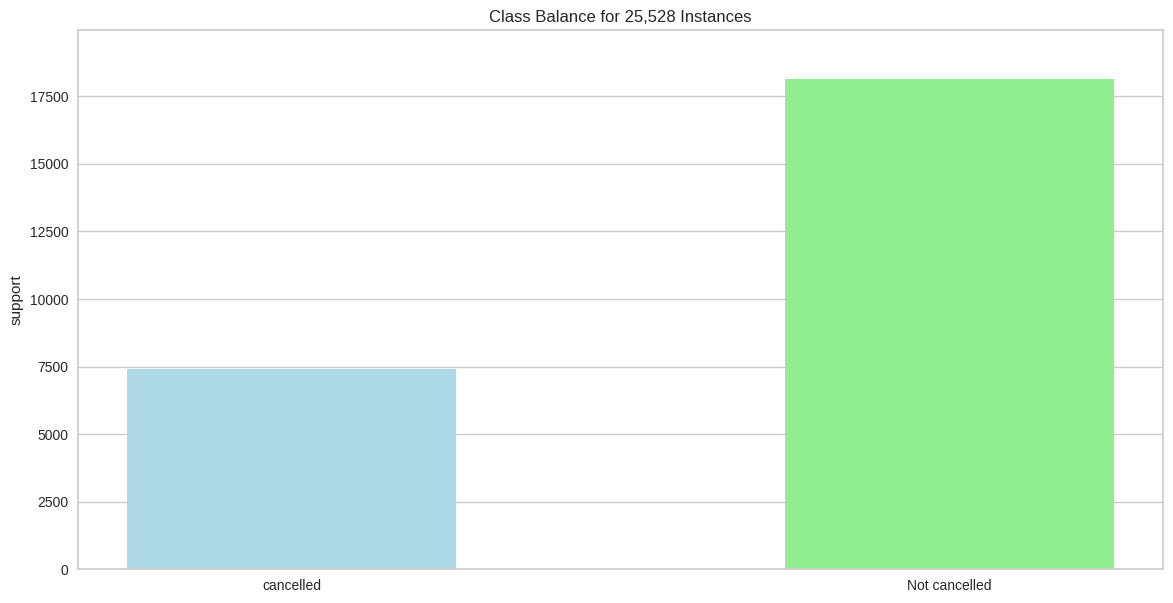

In [ ]:
# Class balance between dependant column 'HeartDisease' values
from yellowbrick.target import ClassBalance

classes = ["cancelled", "Not cancelled"]
plt.figure(figsize=(14, 7))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen"])
viz.fit(y)
viz.show()
plt.show()

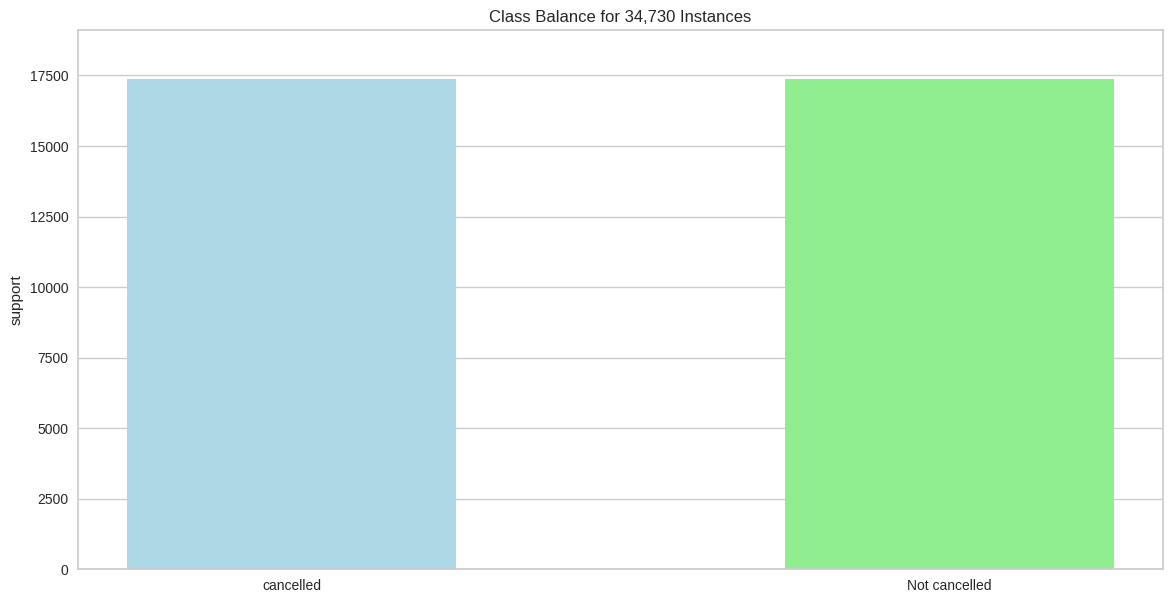

In [ ]:
# Class balance between dependant variable is imbalanced
from imblearn import combine

# To make the dependant variable balanced using SMOTETomek method
smt = combine.SMOTETomek(random_state=14)

# resampling the dataset
X, y = smt.fit_resample(X, y) 

plt.figure(figsize=(14, 7))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen"])
viz.fit(y)
viz.show()
plt.show()

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

X_train.head()

,lead_time,market_segment_type,avg_price_per_room,no_of_special_requests
27847,39,0,165.324,0
18949,79,0,79.200,2
5556,9,0,85.000,1
28898,163,0,105.300,2
12222,144,0,92.550,0


# Training Model

In [ ]:
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler

# Importing the required algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# creating instances of random forest and xgboost to use it for grid search
rf_clf = RandomForestClassifier()
xgb = XGBClassifier()
svc = SVC()

### Grid Search

In [ ]:
# Finding the parameters that gives us the best r2 score
parameters = [{'n_estimators': [50,100,150,200],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [3,5,7],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}]

grid_search = GridSearchCV(estimator = rf_clf,
                           scoring = "recall",    
                           param_grid = parameters,
                           n_jobs=-1,
                           cv=KFold(n_splits=3)
                          )

grid_search.fit(X_train,y_train)
best_recall = grid_search.best_score_
best_params = grid_search.best_estimator_,
print("Best recall value : ",best_recall,"\n","best parameters : ",best_params)

Best recall value :  0.950484586792612 
 best parameters :  (RandomForestClassifier(max_depth=3, max_features='auto', min_samples_split=5,
                       n_estimators=50),)


In [ ]:
# Finding the parameters that gives us the best r2 score
parameters_x = [{'n_estimators': [100, 200, 500],
                'learning_rate': [0.01,0.05,0.1],
                'booster': ['gbtree', 'gblinear'],
                'reg_alpha': [0, 0.5, 1],
                'reg_lambda': [0.5, 1, 5],
                'base_score': [0.2, 0.5, 1]}]

grid_search_x = GridSearchCV(estimator = xgb,
                            scoring = "recall",
                            param_grid = parameters_x,
                            n_jobs=-1,
                            cv=KFold(n_splits=3)
                            )
grid_search_x.fit(X_train,y_train)
best_recall_x = grid_search_x.best_score_
best_params_x = grid_search_x.best_estimator_
best_param = grid_search_x.best_params_
print("Best recall value : ",best_recall_x,"\n","best parameters : ",best_params_x)

[07:59:07] WARNING: ../src/learner.cc:767: 
Parameters: { "gamma" } are not used.

Best recall value :  1.0 
 best parameters :  XGBClassifier(base_score=0.5, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [ ]:
# Finding the parameters that gives us the best r2 score
parameters_s = [{'C': [0.1, 1, 10, 100, 1000], 
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'kernel': ['rbf','linear']}]

grid_search_s = GridSearchCV(estimator = svc,
                            scoring = "recall",
                            param_grid = parameters_s,
                            n_jobs=-1,
                            cv=KFold(n_splits=3)
                            )
grid_search_s.fit(X_train[:500],y_train[:500])
best_recall_s = grid_search_s.best_score_
best_params_s = grid_search_s.best_estimator_
best_param = grid_search_s.best_params_
print("Best recall value : ",best_recall_s,"\n","best parameters : ",best_params_s)

Best recall value :  1.0 
 best parameters :  SVC(C=0.1, gamma=1)


In [ ]:
linear_model = LogisticRegression()
model_svc = SVC(C=0.1, gamma=1)
model_knn = KNeighborsClassifier()
model_nb = GaussianNB()
rf_clf = RandomForestClassifier(max_depth=3, max_features='auto', min_samples_split=5,n_estimators=50)
xgb = XGBClassifier(n_estimators = 100,base_score=0.5,learning_rate=0.01, booster='gblinear')

### Pipeline

In [ ]:
classifiers = [('Logistic Regression', linear_model), ('SVC', model_svc),
              ('K Neighbors', model_knn),('Naive Bayes', model_nb), 
              ('Random Forest', rf_clf),('XGBoost', xgb)]

In [ ]:
models = []
y_preds = []

for classifier_name, classifier in classifiers:

    # Fit regressor to the training set
    models.append(classifier.fit(X_train, y_train))    
   
    # Predict 
    y_preds.append(classifier.predict(X_test))

models

[LogisticRegression(),
 SVC(C=0.1, gamma=1),
 KNeighborsClassifier(),
 GaussianNB(),
 RandomForestClassifier(max_depth=3, max_features='auto', min_samples_split=5,
                        n_estimators=50),
 XGBClassifier(base_score=0.5, booster='gblinear', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.01, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...)]

# Metrics Report

In [ ]:
from sklearn.metrics import (
    recall_score,
    precision_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
)


# function to evaluate model by using accuracy,recall,precision,f1 score
def evaluate(true, predicted):
    accuracy = accuracy_score(true, predicted)
    recall = recall_score(true, predicted)
    precision = precision_score(true, predicted)
    f1 = f1_score(true, predicted)
    
    return accuracy, recall, precision, f1


regev_df = pd.DataFrame(
    data=[
        [linear_model.__class__.__name__, *evaluate(y_test, y_preds[0])],  # calls evaluate() -> test set
        
        [model_svc.__class__.__name__,*evaluate(y_test, y_preds[1])],  # calls evaluate() -> test set
        
        [model_knn.__class__.__name__,*evaluate(y_test, y_preds[2])],  # calls evaluate() -> test set

        [model_nb.__class__.__name__,*evaluate(y_test,  y_preds[4])],  # calls evaluate() -> test set
        
        [rf_clf.__class__.__name__,*evaluate(y_test, y_preds[3])],  # calls evaluate() -> test set
        
        [xgb.__class__.__name__,*evaluate(y_test, y_preds[5])],  # calls evaluate() -> test set
    ],
    columns=["Model Name", "accuracy", "recall", "precision", "f1"]  # column names for the dataframe
)

regev_df  # displays dataframe

,Model Name,accuracy,recall,precision,f1
0,LogisticRegression,0.813274,0.785877,0.835098,0.809740
1,SVC,0.598762,0.228645,0.911464,0.365582
2,KNeighborsClassifier,0.813130,0.748007,0.864145,0.801893
3,GaussianNB,0.823496,0.809510,0.836176,0.822627
4,RandomForestClassifier,0.786784,0.706720,0.846233,0.770209
5,XGBClassifier,0.803484,0.765661,0.832250,0.797568


In [ ]:
xgb.fit(X_train.values, y_train.values)

XGBClassifier(base_score=0.5, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### Class Prediction Error

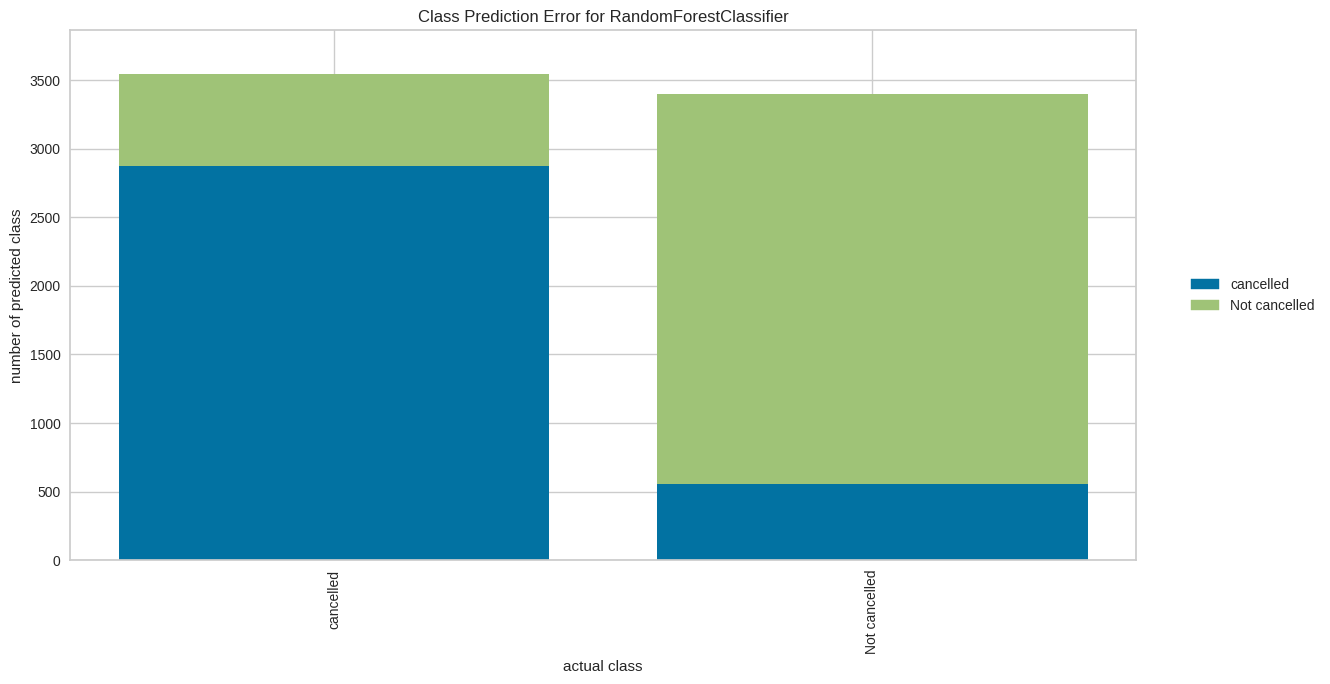

In [ ]:
from yellowbrick.classifier import class_prediction_error

plt.figure(figsize = (15,7))
viz = class_prediction_error( rf_clf, X_train, y_train, X_test, y_test, classes=classes )
viz.show()
plt.show()

In [ ]:
! pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### ROC curve

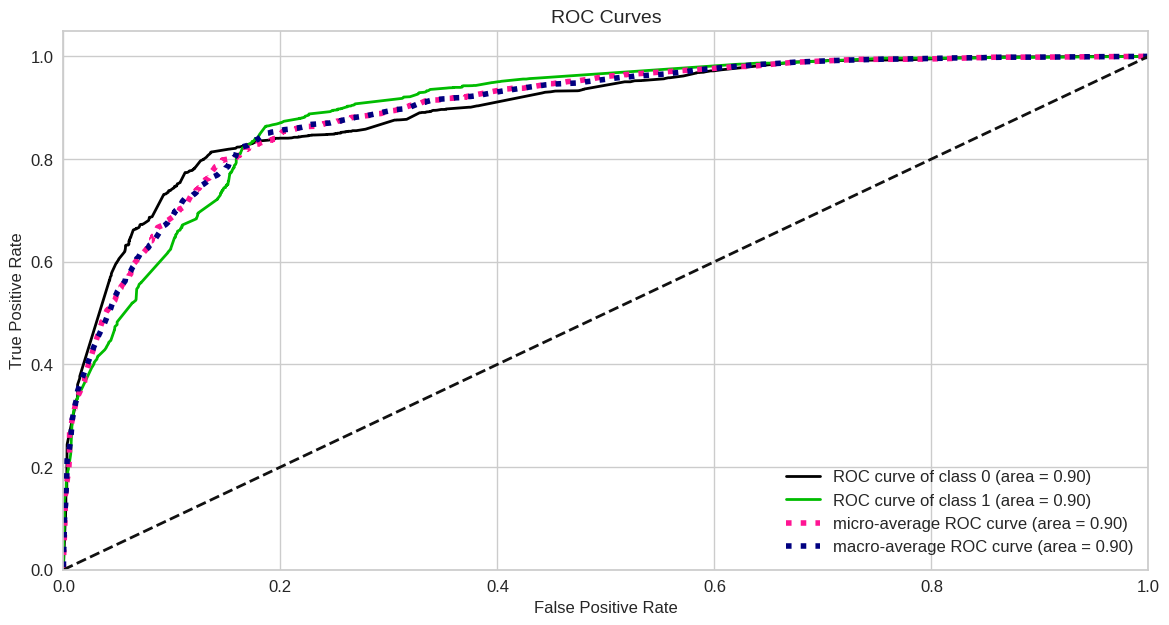

In [ ]:
from scikitplot.metrics import (
    plot_cumulative_gain,
    plot_lift_curve,
    plot_roc,
    plot_precision_recall,
    plot_confusion_matrix,
)
from scikitplot.estimators import plot_learning_curve
y_probas = rf_clf.predict_proba(X_test)
plot_roc(y_test,y_probas, title_fontsize = 14, figsize= (14,7), text_fontsize= 12)
plt.show()

### Precision Recall curve

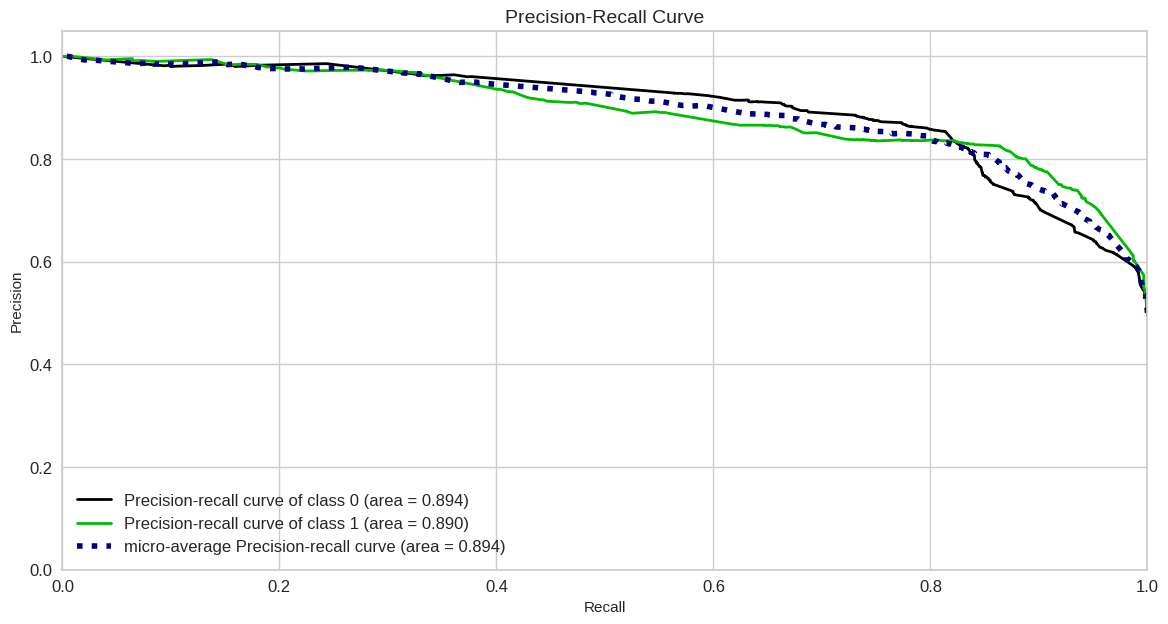

In [ ]:
plot_precision_recall(
    y_test, y_probas, figsize=(14, 7), title_fontsize=14, text_fontsize=12
)
plt.show()

### Learning curve

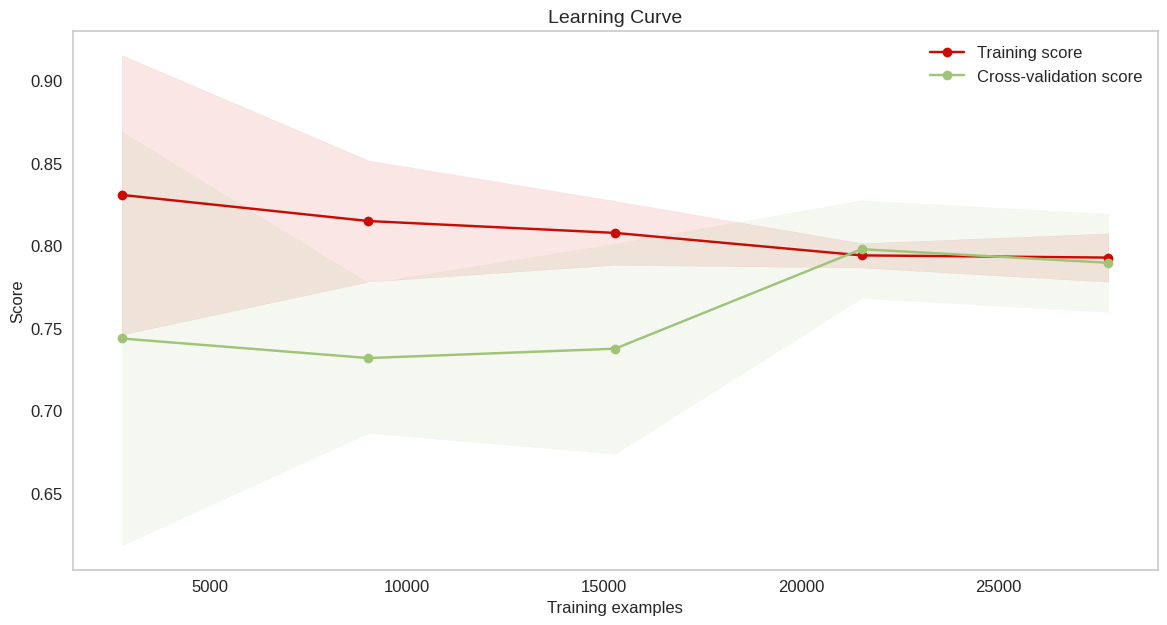

In [ ]:
plot_learning_curve(model_nb, X, y, figsize=(14, 7), title_fontsize=14, text_fontsize=12)
plt.show()

### Lift Curve

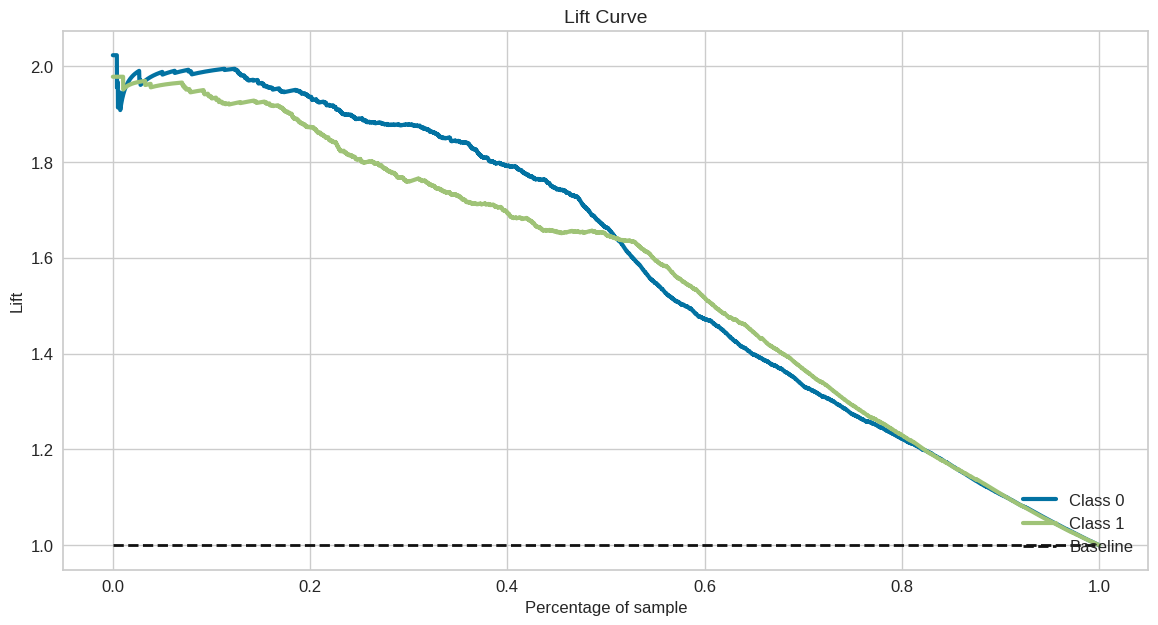

In [ ]:
plot_lift_curve(y_test, y_probas, figsize=(14, 7), title_fontsize=14, text_fontsize=12)
plt.show()

### Cumulative gain curve

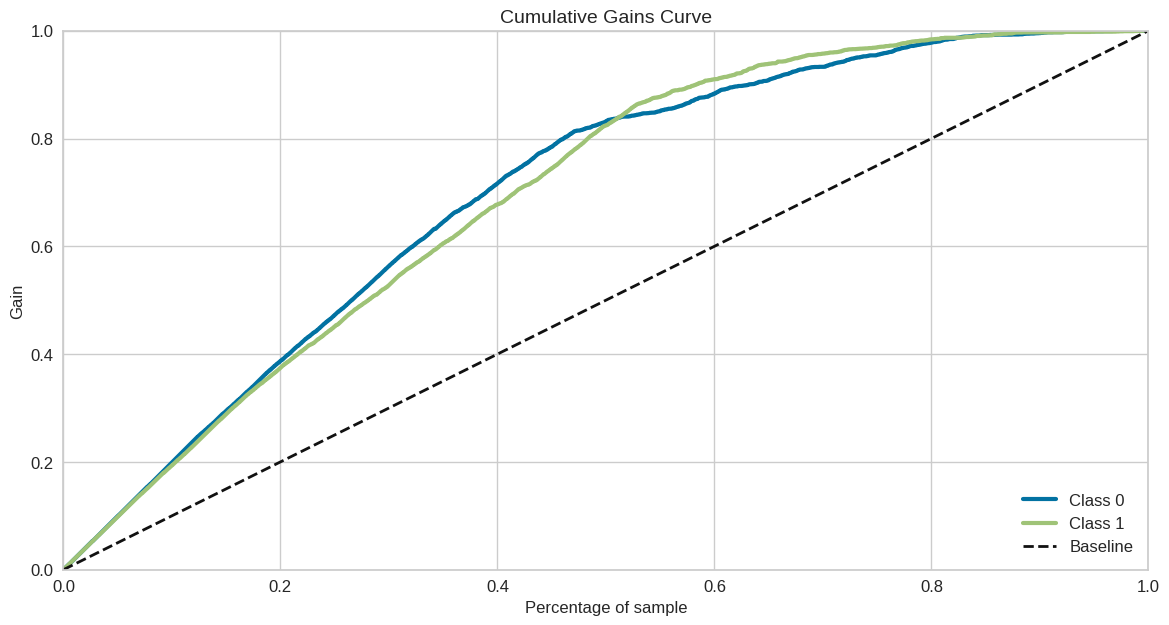

In [ ]:
plot_cumulative_gain(
    y_test, y_probas, figsize=(14, 7), title_fontsize=14, text_fontsize=12
)
plt.show()

##Confusion Matrix

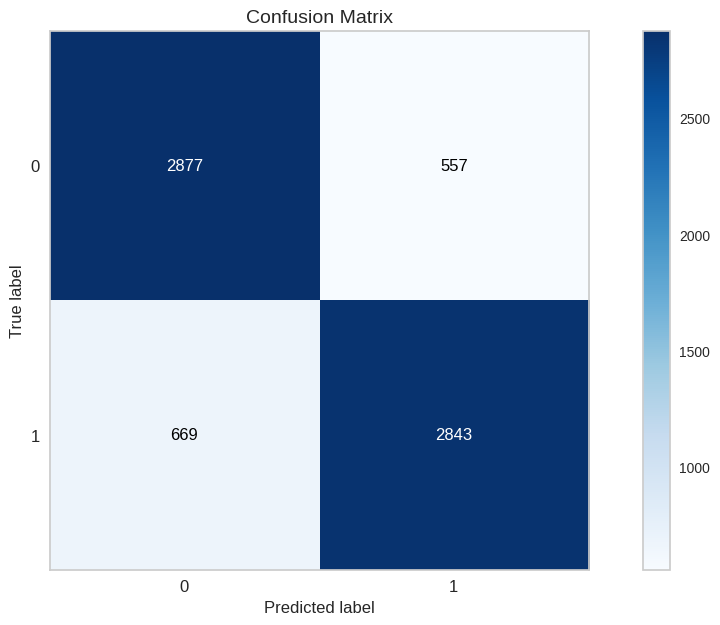

In [ ]:
y_pred = y_preds[4]
plot_confusion_matrix(
    y_test, y_pred, figsize=(14, 7), title_fontsize=14, text_fontsize=12
)
plt.show()

# Classification Report

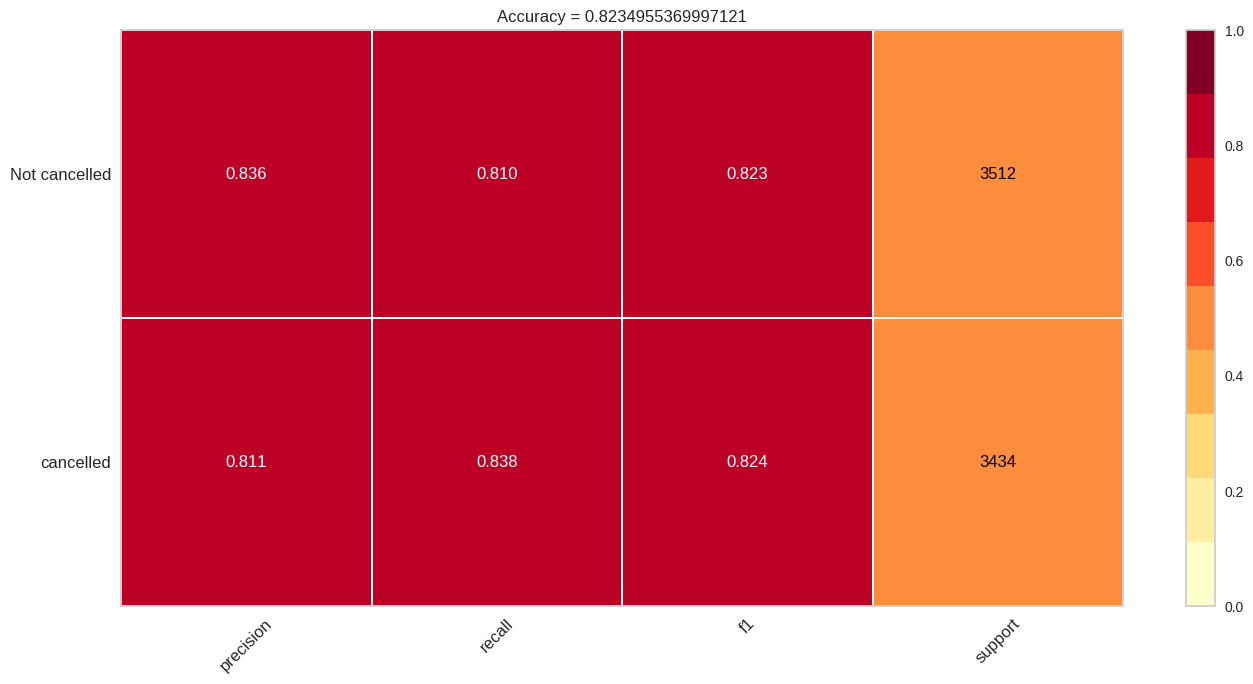

In [ ]:
from yellowbrick.classifier import classification_report

plt.figure(figsize=(14, 7))
visualizer = classification_report(
    rf_clf,
    X_train,
    y_train,
    X_test,
    y_test,
    classes=classes,
    support=True,
    title=f"Accuracy = {str(accuracy_score(y_test, y_pred))}")
plt.show()

#New Predictions

In [ ]:
# function to predict using the trained model
def predict_cancellation(
  	lead_time,market_segment_type,avg_price_per_room,no_of_special_requests

):
    if market_segment_type == "Online":
        market_segment_type = 0
    else:
        market_segment_type = 1

    x = [[lead_time,market_segment_type,avg_price_per_room,no_of_special_requests]]
    return rf_clf.predict(x)

In [ ]:
# Prediction 1
# Input sequence: Age, Sex, ChestPainType, RestingBP, FastingBS, ExerciseAngina, Oldpeak, ST_Slope
prediction = predict_cancellation(224,"Other", 65.00, 0)[0]
print("There is a higher Chance of cancellation for this booking." if prediction else "This Customer is satisfied with the hotel and will most likely not cancel.")

There is a higher Chance of cancellation for this booking.


In [ ]:
# Prediction 2
# Input sequence: Age, Sex, ChestPainType, RestingBP, FastingBS, ExerciseAngina, Oldpeak, ST_Slope
prediction = predict_cancellation(221,"Online", 103.00	, 0)[0]
print("There is a higher Chance of cancellation for this booking." if prediction else "This Customer is satisfied with the hotel and will most likely not cancel.")

This Customer is satisfied with the hotel and will most likely not cancel.


# Saving the Model

In [ ]:
import os
import joblib

if not os.path.exists("../models/"):
    os.mkdir("../models/")
# dump trained model as pickle file
joblib.dump(rf_clf, "../models/model.pkl")
print("Successfully Completed !")

Successfully Completed !


In [ ]:
import os
import joblib

if not os.path.exists("../models/"):
    os.mkdir("../models/")
# dump trained model as pickle file
joblib.dump(linear_model, "../content/drive/MyDrive/models/Cancellation_prediction_linearmodel.pkl")
print("Successfully Completed !")

Successfully Completed !


In [ ]:
import os
import joblib

if not os.path.exists("../models/"):
    os.mkdir("../models/")
# dump trained model as pickle file
joblib.dump(model_svc, "../content/drive/MyDrive/models/Cancellation_prediction_svcmodel.pkl")
print("Successfully Completed !")

Successfully Completed !


In [ ]:
import os
import joblib

if not os.path.exists("../models/"):
    os.mkdir("../models/")
# dump trained model as pickle file
joblib.dump(model_knn, "../content/drive/MyDrive/models/Cancellation_prediction_knnmodel.pkl")
print("Successfully Completed !")

Successfully Completed !


In [ ]:
import os
import joblib

if not os.path.exists("../models/"):
    os.mkdir("../models/")
# dump trained model as pickle file
joblib.dump(xgb, "../content/drive/MyDrive/models/Cancellation_prediction_xgbmodel.pkl")
print("Successfully Completed !")

Successfully Completed !


In [ ]:
import os
import joblib

if not os.path.exists("../models/"):
    os.mkdir("../models/")
# dump trained model as pickle file
joblib.dump(model_nb, "../content/drive/MyDrive/models/Cancellation_prediction_nbmodel.pkl")
print("Successfully Completed !")

Successfully Completed !
